In [229]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
files = os.listdir('Data')
print(files)

['Average spectra.txt', 'DA.txt', 'DA12.PNG', 'DA123.PNG', 'DA13.PNG', 'DA23.PNG', 'DA_fig.PNG', 'EPC-prediction.txt', 'Fourier transform infrared spectroscopic analysis of maize.pdf', 'Gromski_PLSDA_review.pdf', 'HC-prediction.txt', 'Improved Vancouver Raman Algorithm based on Empirical Mode Decomposition for Denoising Biological Samples.pdf', 'Loading.txt', 'PCA1.txt', 'PCA2.txt', 'PCA3.txt', 'PC_fig.PNG', 'Publication.pdf', 'Raman shift.txt', 'Raw-CD18.txt', 'Raw-EPC.txt', 'Raw-EPC2.txt', 'Raw-GN.txt', 'Raw-HC.txt', 'Raw-HC2.txt', 'Raw-HPDE.txt', 'Raw-MiaPaCa.txt', 'Scaled CD18.txt', 'Scaled GN.txt', 'Scaled HPDE.txt', 'Scaled MiaPaCa.txt']


In [231]:
df_average = pd.read_csv(r'Data\Average spectra.txt',sep='\t',header=[0,1])

In [232]:
df_average.head()

,Unnamed: 0_level_0,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation
,Unnamed: 0_level_1,Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34),Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34),Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32),Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32),Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31),Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31),Statistics On Rows of [Book8]H-GN!Col(B):Col(W),Statistics On Rows of [Book8]H-GN!Col(B):Col(W)
0,719.421,1.963618,1.243561,2.089354,1.986297,1.009154,1.718254,1.569937,1.113830
1,720.629,1.889719,1.202215,2.004456,1.919989,0.950310,1.691151,1.485904,1.096629
2,721.838,1.854428,1.155707,1.955802,1.877348,0.902877,1.648838,1.415847,1.076157
3,723.046,1.793777,1.122544,1.928820,1.853950,0.878549,1.622505,1.323568,1.041825
4,724.253,1.746564,1.094122,1.866089,1.827821,0.844380,1.596352,1.222392,0.991328


In [233]:
df_average.shape

(1014, 9)

In [234]:
columns=[('Raman','Frequency'),
         ('Mean','HPDE'),('Standard Deviation','HPDE'),
         ('Mean','CD'),('Standard Deviation','CD'),
         ('Mean','MiaPaCa'),('Standard Deviation','MiaPaCa'),
        ('Mean','GN'),('Standard Deviation','GN')]
df_average.columns = pd.MultiIndex.from_tuples(columns)
df_average.head()

,Raman,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation
,Frequency,HPDE,HPDE,CD,CD,MiaPaCa,MiaPaCa,GN,GN
0,719.421,1.963618,1.243561,2.089354,1.986297,1.009154,1.718254,1.569937,1.113830
1,720.629,1.889719,1.202215,2.004456,1.919989,0.950310,1.691151,1.485904,1.096629
2,721.838,1.854428,1.155707,1.955802,1.877348,0.902877,1.648838,1.415847,1.076157
3,723.046,1.793777,1.122544,1.928820,1.853950,0.878549,1.622505,1.323568,1.041825
4,724.253,1.746564,1.094122,1.866089,1.827821,0.844380,1.596352,1.222392,0.991328


In [235]:
df_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Raman, Frequency)             1014 non-null   float64
 1   (Mean, HPDE)                   1014 non-null   float64
 2   (Standard Deviation, HPDE)     1014 non-null   float64
 3   (Mean, CD)                     1014 non-null   float64
 4   (Standard Deviation, CD)       1014 non-null   float64
 5   (Mean, MiaPaCa)                1014 non-null   float64
 6   (Standard Deviation, MiaPaCa)  1014 non-null   float64
 7   (Mean, GN)                     1014 non-null   float64
 8   (Standard Deviation, GN)       1014 non-null   float64
dtypes: float64(9)
memory usage: 71.4 KB


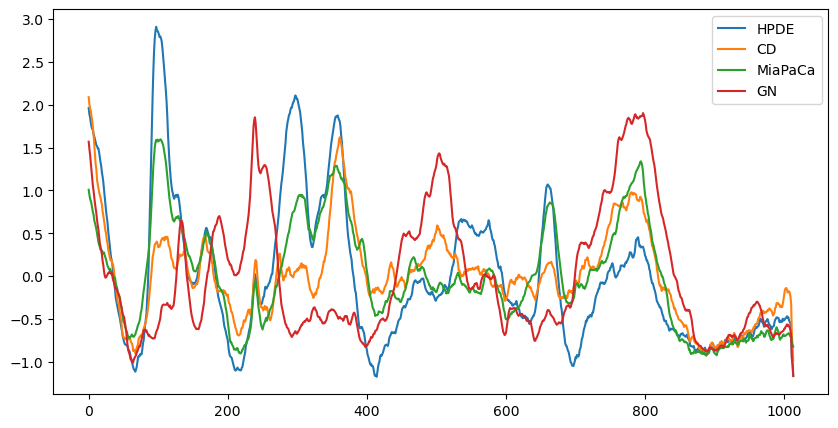

In [236]:
df_average.Mean.plot(figsize=(10,5))
plt.show()

Of course, this is spectroscopic data, which means that x-axis will be in frequency (cm$^{-1}$) and the y-axis will be the intensity.

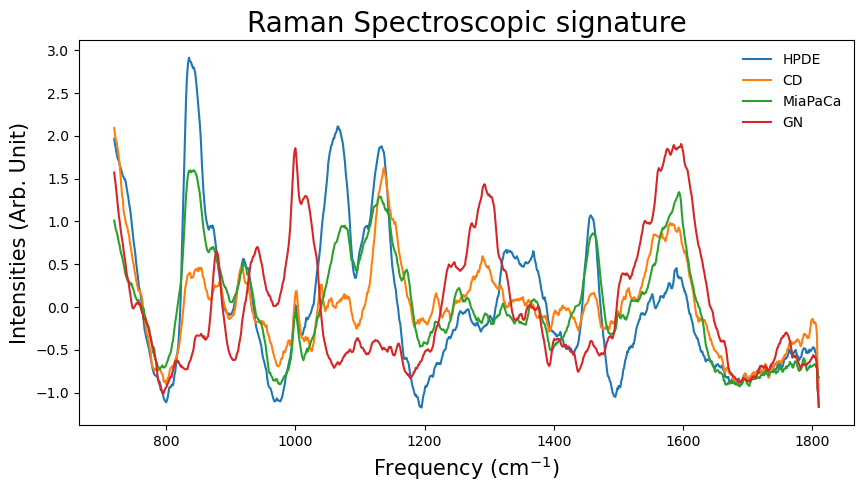

In [237]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(10,5))
plt.title('Raman Spectroscopic signature', fontsize = 20)
plt.plot(df_average.Raman.Frequency,df_average.Mean.HPDE,label='HPDE')
plt.plot(df_average.Raman.Frequency,df_average.Mean.CD,label='CD')
plt.plot(df_average.Raman.Frequency,df_average.Mean.MiaPaCa,label='MiaPaCa')
plt.plot(df_average.Raman.Frequency,df_average.Mean.GN,label='GN')
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.ylabel(r'Intensities (Arb. Unit)',fontsize=15)
plt.legend(frameon=False)
plt.show()

Another way to visualize the spectroscopic response for each cells.

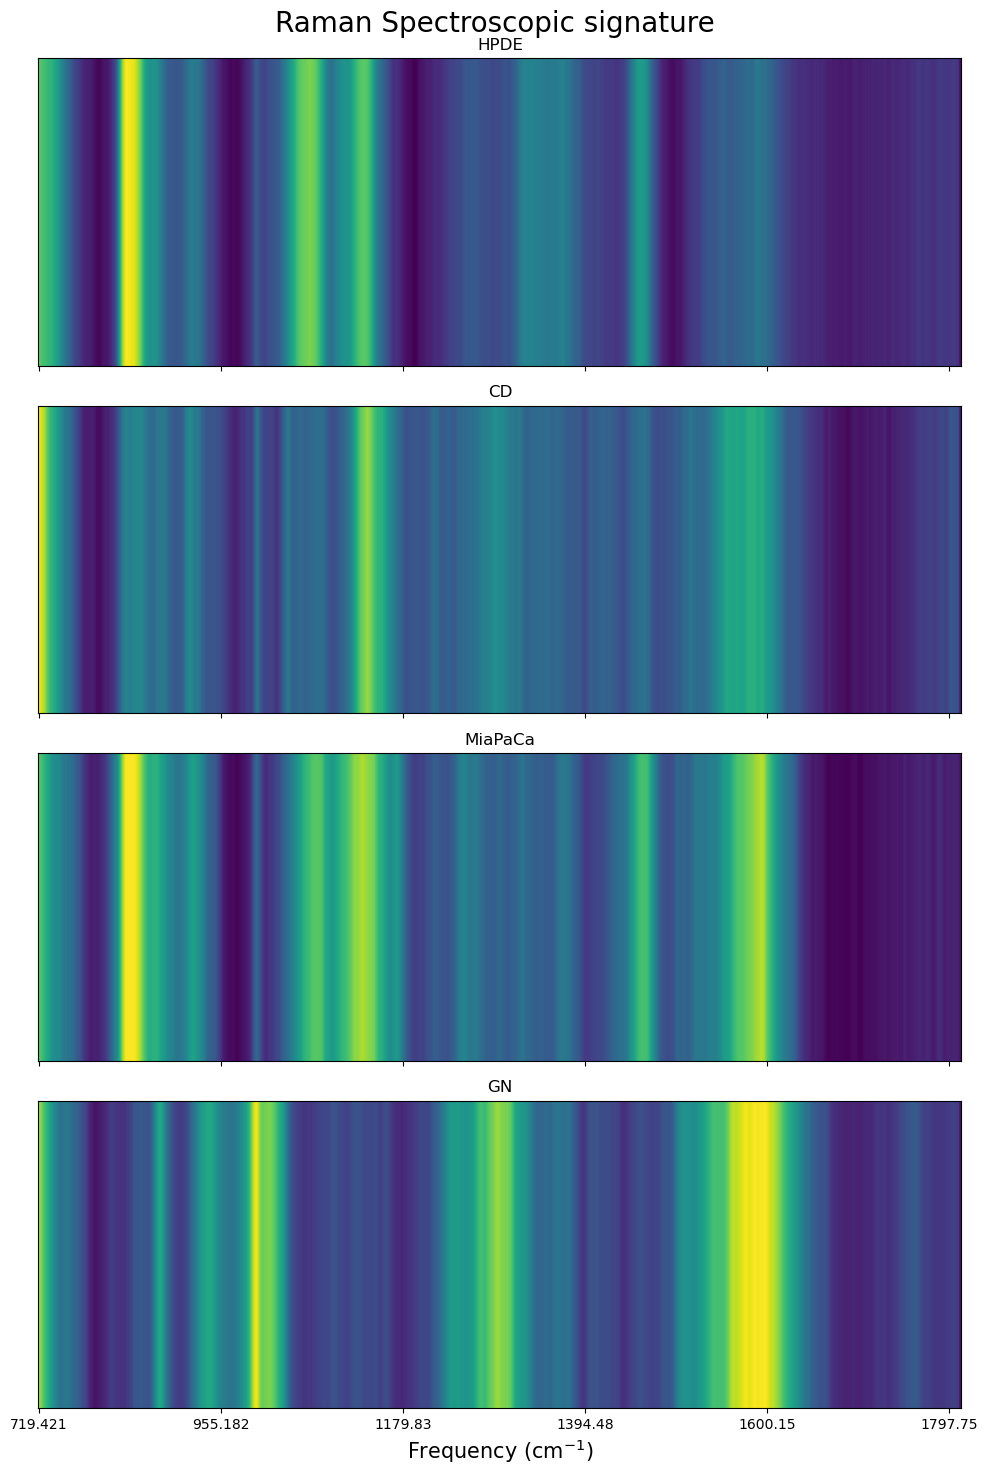

In [238]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
ax[0].imshow([df_average.Mean.HPDE], aspect="auto")
ax[1].imshow([df_average.Mean.CD], aspect="auto")
ax[2].imshow([df_average.Mean.MiaPaCa], aspect="auto")
ax[3].imshow([df_average.Mean.GN], aspect="auto")
ax[0].set_title('HPDE')
ax[1].set_title('CD')
ax[2].set_title('MiaPaCa')
ax[3].set_title('GN')
plt.yticks([])
plt.xticks(np.arange(0, 1013, 200),df_average.Raman.Frequency[::200])
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.tight_layout()
'''
for i in range(4):
    ax[i].axvline(x=300, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
    ax[i].axvline(x=100, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
'''
plt.show()

Now, we can move onto the inspecting the raw data. 

In [239]:
df_raw_HPDE = pd.read_csv(r'Data\Raw-HPDE.txt',sep='\t',header=None)

In [240]:
df_raw_HPDE.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,609.927974,516.114881,754.661668,705.967703,656.738695,632.528348,772.015465,422.591102,765.996989,602.369577,...,483.311159,705.507262,1094.091623,558.716439,629.404883,335.447784,541.850423,648.142592,591.169453,500.048021
1,577.079988,499.306887,741.311767,693.952930,651.909844,622.103451,757.722958,412.738901,740.978701,567.555935,...,452.666774,653.969568,1056.672170,527.188433,625.360328,340.207145,561.789190,618.756330,583.428277,470.389714
2,567.509144,494.778295,719.593730,685.773103,620.875998,593.277308,731.967210,411.354746,721.044885,555.519644,...,459.459738,657.261168,1051.190851,514.644116,630.355072,322.441626,626.401793,622.671054,590.548488,461.038391
3,556.111118,489.338721,702.361336,647.813375,603.297393,564.967912,701.938234,408.748626,723.977596,521.221900,...,419.189169,619.732035,1046.468581,514.961627,614.845027,315.562896,674.224044,604.256185,593.518858,407.134380
4,519.609050,484.045332,672.881351,625.759229,563.098662,549.233632,695.287774,406.290715,703.507303,491.233679,...,397.359816,574.102433,1035.141097,542.418861,596.166903,284.773470,675.428521,611.291960,614.497281,404.700299


In [241]:
df_raw_HPDE.shape

(1014, 35)

In [242]:
df_raw_CD = pd.read_csv(r'Data\Raw-CD18.txt',sep='\t',header=None)

In [243]:
df_raw_CD.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,462.250553,-88.956977,12211.075787,138.476666,722.523025,790.705515,16833.155629,482.846254,924.675995,18.519408,...,682.997381,4134.879267,721.836516,570.964342,11876.248771,428.721259,1390.759272,14686.044405,348.268072,636.765977
1,436.982475,-84.542468,10383.473577,139.684022,657.891275,779.193184,17778.051350,411.258819,917.786714,-34.277209,...,698.004300,4108.956426,663.477808,565.805419,11187.847228,427.103716,1534.804320,15007.618378,303.723261,624.358963
2,418.922427,-39.028311,8976.035486,136.195751,628.512955,748.924845,18697.846470,379.465945,924.332020,-40.762669,...,713.090873,4115.688617,630.933029,558.807819,10571.188859,416.175049,1666.264862,15376.107605,248.493055,598.615002
3,424.457974,-10.446520,6262.718792,146.769691,596.923084,741.777124,20269.935530,367.395086,881.996792,-87.290297,...,710.063955,4136.342320,618.125645,552.979513,9670.870581,418.423881,1886.847811,16164.213116,213.520312,576.200426
4,422.589851,4.341221,4232.948800,140.303686,578.548094,701.832739,21081.587106,303.697568,865.527296,-81.014289,...,711.436156,4166.678987,603.947787,533.675528,8967.153636,421.664330,1940.952292,16767.097985,157.238793,551.541815


In [244]:
df_raw_CD.shape

(1014, 33)

In [245]:
df_frequency = pd.read_csv(r'Data\Raman shift.txt',sep='\t',header=None)

In [246]:
df_frequency.head()

,0,1
0,719.421,NaN
1,720.629,NaN
2,721.838,NaN
3,723.046,NaN
4,724.253,NaN


In [247]:
df_frequency[1].isna().sum()

1014

In [248]:
df_frequency.drop(columns=1,axis=1,inplace=True)

In [249]:
df_frequency.head()

,0
0,719.421
1,720.629
2,721.838
3,723.046
4,724.253


In [250]:
df_frequency.column = 'Frequency'

In [251]:
df_raw_EPC = pd.read_csv(r'Data\Raw-EPC.txt',sep='\s+',header=None)

In [252]:
df_raw_EPC.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,3203.163535,6320.974384,6887.646015,-467.071908,309.968360,23964.023828,4914.055589,2071.515841,7798.466443,927.605080,...,17106.364263,3213.326052,2235.211800,1647.692268,17618.585039,2041.744264,2277.645859,-1456.801366,13727.676672,-1119.050078
1,3103.180691,6321.751083,6161.643276,-653.364664,352.574265,23180.087714,4665.178293,2089.593892,7536.362115,1031.550350,...,16108.988438,3196.324199,2227.484274,1640.470158,17481.837070,2059.917444,2196.018035,-1353.687698,14036.332729,-1209.851583
2,2986.780580,6283.240725,5535.486579,-630.492983,392.886723,22482.484591,4311.171479,2064.169876,7288.770278,1110.889652,...,15021.524728,3191.308086,2219.452056,1628.435502,17402.646657,2050.200713,2114.993612,-1254.919115,14203.433016,-1466.771130
3,2933.909809,6313.348074,5646.613963,-800.367063,466.192310,21778.753585,4068.409457,2068.370215,7058.793922,1297.059204,...,14279.604815,3162.814938,2218.215596,1642.432518,17757.111924,2050.864642,2044.587138,-1162.628716,14727.702996,-1761.390038
4,2959.257669,6328.991128,6306.360640,-567.606996,475.672052,21194.492801,3748.711404,2084.700672,6776.520803,1518.303385,...,13523.335750,3248.812738,2205.956784,1703.840559,18033.226992,2093.804655,1969.941371,-977.857172,15065.059637,-1891.941108


In [253]:
df_raw_EPC.shape

(1013, 55)

In [254]:
df_raw_EPC2 = pd.read_csv(r'Data\Raw-EPC2.txt',sep='\s+',header=None)

In [255]:
df_raw_EPC2.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,581.899206,-168.985577,-179.710030,-182.049615,2377.232531,1439.513142,56368.903752,-128.628921,8664.769405,1302.905387,...,-1026.891116,2108.599522,836.056391,2369.803079,-184.149094,-149.793292,977.776456,15002.007838,-5.647692,820.770585
1,613.983272,-110.185162,-116.774939,-166.981462,2326.903225,1456.938548,54562.986421,-126.600008,8460.275539,1316.941872,...,-979.478719,2103.956206,809.058785,2606.446663,-129.519384,-99.907468,967.913236,13520.234276,25.535020,863.304970
2,599.851085,-77.109569,-93.205683,-145.640647,2205.992330,1463.733499,52244.328672,-138.971015,8157.918141,1280.981950,...,-1005.070031,2167.187996,814.162470,2759.642151,-95.634574,-72.685480,981.259543,12134.442636,60.758067,896.288231
3,593.456322,-38.334370,-70.958203,-142.017365,2147.541559,1488.171605,48137.172235,-195.685023,7783.453295,1277.575975,...,-1024.451703,2220.851608,855.599036,3196.568610,-62.872740,-28.588225,991.496365,10738.174535,273.647065,993.025950
4,594.775348,7.628597,-28.362549,-71.620603,2058.137154,1506.016144,42947.097344,-263.929965,7364.941814,1266.669817,...,-972.301724,2341.520915,850.865488,3743.599119,-23.792392,17.693773,1031.349264,9166.361870,379.826107,1087.840792


In [256]:
df_raw_EPC2.shape

(1013, 120)

In [257]:
df_raw_GN = pd.read_csv(r'Data\Raw-GN.txt',sep='\s+',header=None)

In [258]:
df_raw_GN.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2160.348717,1314.579420,3218.265846,2351.634956,1718.374803,1054.734117,1495.768736,1687.681208,838.412255,1455.511128,...,1189.056338,655.610102,1195.173062,1364.227497,1059.646051,734.268796,2769.263332,3124.997898,1711.264905,1680.924476
1,2045.885705,1297.393931,3195.264459,2272.111147,1695.248236,1085.340363,1431.383846,1603.925439,761.849748,1374.513051,...,1061.548439,616.494438,1206.968712,1189.309195,1067.676532,721.596722,2642.759384,3006.950948,1668.187469,1613.478943
2,1989.764491,1252.535351,3138.935280,2239.438805,1672.247913,1093.915553,1406.870278,1557.384257,705.467276,1367.470748,...,970.183124,596.253803,1184.270459,1107.595288,1019.047836,680.217221,2543.644357,2925.022553,1586.802863,1572.875803
3,1951.439372,1232.810425,3011.697036,2220.894062,1628.383404,1159.616311,1353.378038,1502.961437,649.927359,1267.311728,...,851.921660,573.872773,1131.874819,953.322572,992.805555,646.171478,2456.899857,2838.141830,1506.328355,1478.687291
4,1897.763294,1183.869128,2876.850879,2193.998714,1506.630255,1158.025564,1308.014322,1467.167992,566.581489,1144.444349,...,748.880127,592.389565,1055.854998,844.907811,966.076031,634.805981,2336.305663,2731.480400,1497.707680,1394.192856


In [259]:
df_raw_GN.shape

(1014, 22)

In [260]:
df_raw_HC = pd.read_csv(r'Data\Raw-HC.txt',sep='\s+',header=None)

In [261]:
df_raw_HC.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,664.066369,891.519617,-55.185891,789.077141,756.648636,575.395903,812.793173,631.869852,3377.424394,1225.919616,...,29.214720,5741.079109,-4075.177635,-962.449543,46085.982967,16994.411469,-52.107264,-1290.924259,-1161.970246,20166.640066
1,727.637950,938.968041,-20.001006,784.202377,811.105970,620.008865,837.406006,635.436913,3626.686697,1233.630143,...,67.675125,5845.833450,-2910.158181,-920.334063,44825.210704,16971.574966,36.375592,-1183.832011,-1075.916837,18732.060172
2,719.349410,943.849373,1.420800,777.689599,789.311420,625.776152,863.507211,649.299885,3937.332330,1242.919809,...,92.551005,5930.309376,-2014.917612,-890.593846,43538.695113,16681.662158,77.638293,-1108.209207,-1039.534287,17364.742541
3,771.963997,975.847488,40.013175,826.842720,816.972423,689.352168,876.225500,661.545420,4395.367705,1238.143204,...,126.703477,6084.008584,-462.622593,-903.940795,42375.339802,16546.408443,79.839218,-818.619517,-908.831754,14780.186982
4,812.518125,1027.312499,74.733424,810.081306,847.967557,699.872646,887.305153,679.512831,4807.660441,1252.448052,...,154.074688,6256.793708,325.072843,-866.324594,41136.213330,15818.275651,173.226593,-518.478614,-770.107138,12482.214654


In [262]:
df_raw_HC.shape

(1013, 60)

In [263]:
df_raw_HC2 = pd.read_csv(r'Data\Raw-HC2.txt',sep='\s+',header=None)

In [264]:
df_raw_HC2.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1008.600674,-176.331239,-248.210781,-211.621177,-152.701312,-163.797481,114.916213,-26.551247,-204.156848,-922.529271,...,-118.983831,-785.670250,-442.223228,-565.895180,11899.686997,-1466.700795,40.748809,-78.988593,-821.789023,872.508664
1,1046.371463,-147.584618,-200.509401,-156.480285,-126.970755,-126.804979,226.510538,48.387896,-145.021424,-887.725883,...,-296.501999,-549.425264,-479.016974,-495.175035,11579.851837,-1202.731401,87.915315,-60.076447,-941.850909,866.826500
2,978.631157,-112.422007,-158.221211,-116.235692,-94.430349,-59.928333,298.777360,88.365984,-111.003317,-883.415887,...,-504.824634,-362.698155,-513.150226,-435.747824,11314.132757,-971.307879,105.810732,-29.435275,-1017.920529,915.228065
3,814.376885,-63.540342,-94.486609,-60.710620,-87.698196,-7.100967,394.487054,146.945886,-61.440373,-836.645116,...,-684.975727,-55.706231,-535.935830,-359.469506,11176.782171,-626.442796,155.594252,3.855931,-1183.958936,920.117639
4,704.080718,-19.986074,-54.767168,-13.401172,-47.806272,45.427068,450.609431,182.098345,-8.919438,-776.367364,...,-659.530411,143.510836,-486.122782,-270.028946,11164.175387,-329.362564,145.734191,53.843324,-1262.201270,872.797323


In [265]:
df_raw_HC2.shape

(1013, 110)

In [266]:
df_raw_MiaPaCa = pd.read_csv(r'Data\Raw-MiaPaCa.txt',sep='\s+',header=None)

In [267]:
df_raw_MiaPaCa.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,986.134289,3191.825457,-2.535792,381.293306,-14.670542,222.150897,283.214723,-10.688220,4014.044286,1567.222465,...,28581.246327,319.677679,755.957734,8008.400770,550.821570,475.220347,424.548050,183.399571,49.565123,291.349689
1,968.238898,2387.663019,-13.405950,323.864640,-13.062933,221.195522,274.867820,-6.973148,3329.342639,1497.822661,...,27494.121593,314.584347,706.747435,7704.657802,543.220942,475.095789,401.035342,165.500022,55.983494,298.719220
2,940.958141,2042.282002,-4.439658,283.158469,18.430079,212.515654,304.850952,0.275607,2779.738368,1405.961540,...,26730.718074,306.062605,687.922333,7546.049323,546.734571,457.565767,394.257941,153.319906,51.380073,301.287580
3,931.451280,1140.520027,16.551258,240.507895,72.736326,195.481008,391.133158,26.687282,2049.528623,1295.990866,...,26154.070758,306.240677,665.283137,7362.425379,527.072509,452.180077,386.850138,161.356251,29.136447,302.037695
4,897.871235,957.922213,8.585703,220.874240,103.296138,186.407781,503.418555,37.810452,1464.217353,1168.197266,...,25731.896853,300.289221,652.321148,7330.103420,524.098047,431.193937,378.305130,153.314808,42.126248,288.379379


In [268]:
df_raw_MiaPaCa.shape

(1014, 31)

Since the shape is either 1013 or 1014, we can drop one data point to make 1013 data points universal.

In [269]:
df_frequency.drop([0],inplace=True)

In [270]:
df_average.drop([0],inplace=True)

In [271]:
df_raw_CD.drop([0],inplace=True)
df_raw_HPDE.drop([0],inplace=True)
df_raw_GN.drop([0],inplace=True)
df_raw_MiaPaCa.drop([0],inplace=True)

In [272]:
print(df_average.shape)
print(df_raw_CD.shape)
print(df_raw_HPDE.shape)
print(df_raw_GN.shape)
print(df_raw_MiaPaCa.shape)

(1013, 9)
(1013, 33)
(1013, 35)
(1013, 22)
(1013, 31)


Now we can visualize the data for each cells

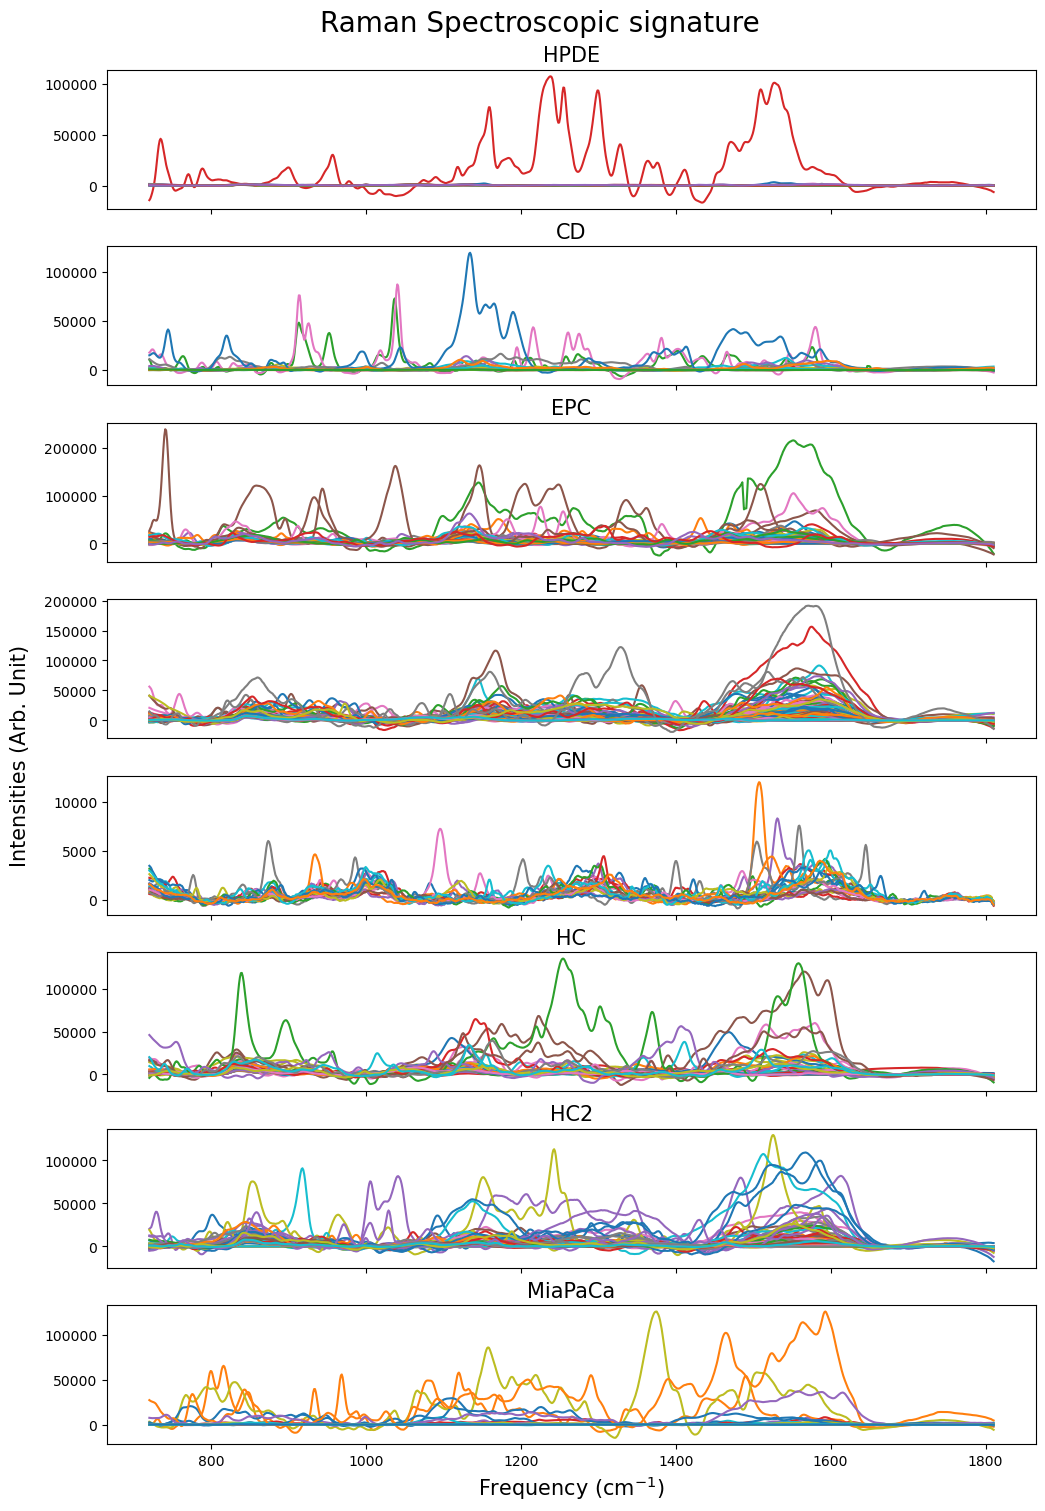

In [273]:
fig, ax = plt.subplots(8,1,sharex=True,sharey=False,layout="constrained")
plt.rcParams['figure.figsize'] = 10, 15
#plt.subplots_adjust(left=0.1, bottom=0.1, right**=**0.9,top=0.9, wspace=0.4,hspace=0.4)
pd.option_context('mode.use_inf_as_na', True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
for i in range(df_raw_HPDE.shape[1]):
    ax[0].plot(df_frequency,df_raw_HPDE.iloc[:,i],label='HPDE')
    ax[0].set_title('HPDE',fontsize=15)
for i in range(df_raw_CD.shape[1]):
    ax[1].plot(df_frequency,df_raw_CD.iloc[:,i],label='CD')
    ax[1].set_title('CD',fontsize=15)
for i in range(df_raw_EPC.shape[1]):
    ax[2].plot(df_frequency,df_raw_EPC.iloc[:,i],label='EPC')
    ax[2].set_title('EPC',fontsize=15)
for i in range(df_raw_EPC2.shape[1]):
    ax[3].plot(df_frequency,df_raw_EPC2.iloc[:,i],label='EPC2')
    ax[3].set_title('EPC2',fontsize=15)
for i in range(df_raw_GN.shape[1]):
    ax[4].plot(df_frequency,df_raw_GN.iloc[:,i],label='GN')
    ax[4].set_title('GN',fontsize=15)
for i in range(df_raw_HC.shape[1]):
    ax[5].plot(df_frequency,df_raw_HC.iloc[:,i],label='HC')
    ax[5].set_title('HC',fontsize=15)
for i in range(df_raw_HC2.shape[1]):
    ax[6].plot(df_frequency,df_raw_HC2.iloc[:,i],label='HC2')
    ax[6].set_title('HC2',fontsize=15)
for i in range(df_raw_MiaPaCa.shape[1]):
    ax[7].plot(df_frequency,df_raw_MiaPaCa.iloc[:,i],label='MiaPaCa')
    ax[7].set_title('MiaPaCa',fontsize=15)

plt.gcf().text(-0.02,0.5, "Intensities (Arb. Unit)", ha="center", va="center", rotation=90, fontsize=15)
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
#plt.legend()
#plt.tight_layout()
plt.show()

**Note:** Here, HPDE, CD, MiaPaCa, and GN are exosomes from different cells, which are identified as a marker for pancreatic cancer cells. HC are the cells from healthy control group and EPC are the early pancreatic cancer cell group. 

The author uses Vancouver Raman algorithm to remove flourescence by fitting the polynomial regression. Also, there are modified Vancouver Raman algorithm to denoise, correct baseline (fitting the flourescence), and so on. The author also normalizes the spectra as well. 

In [274]:
df_scaled_CD = pd.read_csv(r'Data\Scaled CD18.txt',sep='\s+',header=None)
print(df_scaled_CD.shape)
df_scaled_CD.columns = ['CD_scaled_'+str(i) for i in range(df_scaled_CD.shape[1])]
df_scaled_CD.head()

(1014, 33)


,CD_scaled_0,CD_scaled_1,CD_scaled_2,CD_scaled_3,CD_scaled_4,CD_scaled_5,CD_scaled_6,CD_scaled_7,CD_scaled_8,CD_scaled_9,...,CD_scaled_23,CD_scaled_24,CD_scaled_25,CD_scaled_26,CD_scaled_27,CD_scaled_28,CD_scaled_29,CD_scaled_30,CD_scaled_31,CD_scaled_32
0,0.627240,-0.808440,0.785649,-0.286407,1.117742,1.198693,0.783460,0.269363,-0.011685,-0.814099,...,3.614682,0.793426,5.294379,2.974757,2.181770,3.626305,0.989208,0.081365,-0.699944,5.020930
1,0.544890,-0.803976,0.580486,-0.284544,0.951922,1.171875,0.859946,0.117320,-0.017348,-0.833708,...,3.721372,0.783691,4.771051,2.938056,1.990713,3.608480,1.170498,0.098765,-0.718982,4.903327
2,0.486031,-0.757946,0.422489,-0.289928,0.876549,1.101364,0.934400,0.049795,-0.011968,-0.836117,...,3.828628,0.786220,4.479207,2.888274,1.819568,3.488046,1.335950,0.118705,-0.742587,4.659306
3,0.504072,-0.729041,0.117898,-0.273608,0.795501,1.084714,1.061655,0.024158,-0.046767,-0.853397,...,3.807108,0.793976,4.364357,2.846810,1.569697,3.512828,1.613569,0.161349,-0.757534,4.446844
4,0.497984,-0.714085,-0.109961,-0.283588,0.748358,0.991662,1.127355,-0.111128,-0.060305,-0.851067,...,3.816864,0.805368,4.237218,2.709478,1.374390,3.548538,1.681663,0.193972,-0.781588,4.213111


In [275]:
df_scaled_GN = pd.read_csv(r'Data\Scaled GN.txt',sep='\s+',header=None)
print(df_scaled_GN.shape)
df_scaled_GN.columns = ['GN_scaled_'+str(i) for i in range(df_scaled_GN.shape[1])]
df_scaled_GN.head()

(1014, 22)


,GN_scaled_0,GN_scaled_1,GN_scaled_2,GN_scaled_3,GN_scaled_4,GN_scaled_5,GN_scaled_6,GN_scaled_7,GN_scaled_8,GN_scaled_9,...,GN_scaled_12,GN_scaled_13,GN_scaled_14,GN_scaled_15,GN_scaled_16,GN_scaled_17,GN_scaled_18,GN_scaled_19,GN_scaled_20,GN_scaled_21
0,1.605200,0.480491,4.279952,1.537541,0.646067,1.565064,0.839120,0.641616,1.293977,0.680262,...,0.572399,0.810921,3.234632,2.501736,1.417842,0.317277,3.007618,2.281700,1.695935,1.377771
1,1.478035,0.468102,4.243459,1.456568,0.628288,1.634938,0.774027,0.578849,1.094202,0.596664,...,0.433070,0.731839,3.273524,2.075808,1.434043,0.297958,2.835588,2.166988,1.634570,1.294449
2,1.415687,0.435763,4.154088,1.423301,0.610606,1.654515,0.749243,0.543971,0.947084,0.589395,...,0.333233,0.690918,3.198684,1.876833,1.335939,0.234872,2.700803,2.087374,1.518635,1.244289
3,1.373109,0.421543,3.952214,1.404418,0.576885,1.804510,0.695163,0.503187,0.802163,0.486022,...,0.204007,0.645669,3.025929,1.501176,1.282998,0.182967,2.582841,2.002947,1.403997,1.127930
4,1.313476,0.386261,3.738269,1.377033,0.483284,1.800878,0.649300,0.476363,0.584689,0.359211,...,0.091412,0.683105,2.775281,1.237185,1.229074,0.165640,2.418848,1.899299,1.391716,1.023547


In [276]:
df_scaled_HPDE = pd.read_csv(r'Data\Scaled HPDE.txt',sep='\s+',header=None)
print(df_scaled_HPDE.shape)
df_scaled_HPDE.columns = ['HPDE_scaled_'+str(i) for i in range(df_scaled_HPDE.shape[1])]
df_scaled_HPDE.head()

(1014, 35)


,HPDE_scaled_0,HPDE_scaled_1,HPDE_scaled_2,HPDE_scaled_3,HPDE_scaled_4,HPDE_scaled_5,HPDE_scaled_6,HPDE_scaled_7,HPDE_scaled_8,HPDE_scaled_9,...,HPDE_scaled_25,HPDE_scaled_26,HPDE_scaled_27,HPDE_scaled_28,HPDE_scaled_29,HPDE_scaled_30,HPDE_scaled_31,HPDE_scaled_32,HPDE_scaled_33,HPDE_scaled_34
0,2.560051,1.970449,3.037619,3.033875,2.412465,2.823622,3.452165,1.805597,3.296075,2.898464,...,0.594899,2.282256,2.820799,1.766969,1.576723,0.498329,1.124748,1.941478,1.166412,0.235613
1,2.381410,1.883087,2.970336,2.969361,2.388290,2.764960,3.374450,1.744433,3.162275,2.688602,...,0.494378,2.040423,2.688267,1.607042,1.559853,0.518802,1.205917,1.810946,1.136220,0.147063
2,2.329360,1.859549,2.860879,2.925439,2.232922,2.602753,3.234404,1.735840,3.055666,2.616045,...,0.516661,2.055868,2.668853,1.543411,1.580687,0.442381,1.468947,1.828335,1.163990,0.119143
3,2.267373,1.831276,2.774029,2.721611,2.144916,2.443454,3.071123,1.719661,3.071351,2.409292,...,0.384564,1.879769,2.652128,1.545021,1.515992,0.412792,1.663626,1.746537,1.175575,-0.041795
4,2.068860,1.803762,2.625452,2.603190,1.943666,2.354916,3.034961,1.704402,2.961873,2.228518,...,0.312958,1.665659,2.612008,1.684299,1.438083,0.280347,1.668530,1.777790,1.257393,-0.049063


In [277]:
df_scaled_MiaPaCa = pd.read_csv(r'Data\Scaled MiaPaCa.txt',sep='\s+',header=None)
print(df_scaled_MiaPaCa.shape)
df_scaled_MiaPaCa.columns = ['MiaPaCa_scaled_'+str(i) for i in range(df_scaled_MiaPaCa.shape[1])]
df_scaled_MiaPaCa.head()

(1014, 31)


,MiaPaCa_scaled_0,MiaPaCa_scaled_1,MiaPaCa_scaled_2,MiaPaCa_scaled_3,MiaPaCa_scaled_4,MiaPaCa_scaled_5,MiaPaCa_scaled_6,MiaPaCa_scaled_7,MiaPaCa_scaled_8,MiaPaCa_scaled_9,...,MiaPaCa_scaled_21,MiaPaCa_scaled_22,MiaPaCa_scaled_23,MiaPaCa_scaled_24,MiaPaCa_scaled_25,MiaPaCa_scaled_26,MiaPaCa_scaled_27,MiaPaCa_scaled_28,MiaPaCa_scaled_29,MiaPaCa_scaled_30
0,2.279001,-0.493665,-0.837637,-0.675826,-0.654590,0.827089,-0.310579,-0.794842,-0.667363,0.306805,...,0.002890,1.455419,1.612946,-0.048173,3.220945,2.680854,2.322535,-0.178839,-0.795637,1.208965
1,2.224572,-0.546858,-0.902667,-0.705791,-0.653416,0.820007,-0.322965,-0.782919,-0.694757,0.262347,...,-0.034115,1.415905,1.455756,-0.078448,3.162044,2.679886,2.129003,-0.261592,-0.769948,1.266487
2,2.141597,-0.569704,-0.849027,-0.727031,-0.630418,0.755663,-0.278471,-0.759654,-0.716747,0.203500,...,-0.060101,1.349793,1.395624,-0.094257,3.189273,2.543733,2.073219,-0.317903,-0.788373,1.286535
3,2.112681,-0.629354,-0.723450,-0.749285,-0.590760,0.629385,-0.150431,-0.674885,-0.745962,0.133052,...,-0.079730,1.351175,1.323308,-0.112559,3.036901,2.501903,2.012246,-0.280749,-0.877399,1.292390
4,2.010547,-0.641432,-0.771103,-0.759530,-0.568444,0.562125,0.016198,-0.639184,-0.769380,0.051186,...,-0.094101,1.305004,1.281904,-0.115781,3.013851,2.338906,1.941912,-0.317927,-0.825410,1.185780


Same with the scaled data. We will need to reduce the dimension from 1014 to 1013.

In [278]:
df_scaled_CD.drop([0],inplace=True)
df_scaled_GN.drop([0],inplace=True)
df_scaled_HPDE.drop([0],inplace=True)
df_scaled_MiaPaCa.drop([0],inplace=True)

In [279]:
print(df_scaled_CD.shape)
print(df_scaled_GN.shape)
print(df_scaled_HPDE.shape)
print(df_scaled_MiaPaCa.shape)

(1013, 33)
(1013, 22)
(1013, 35)
(1013, 31)


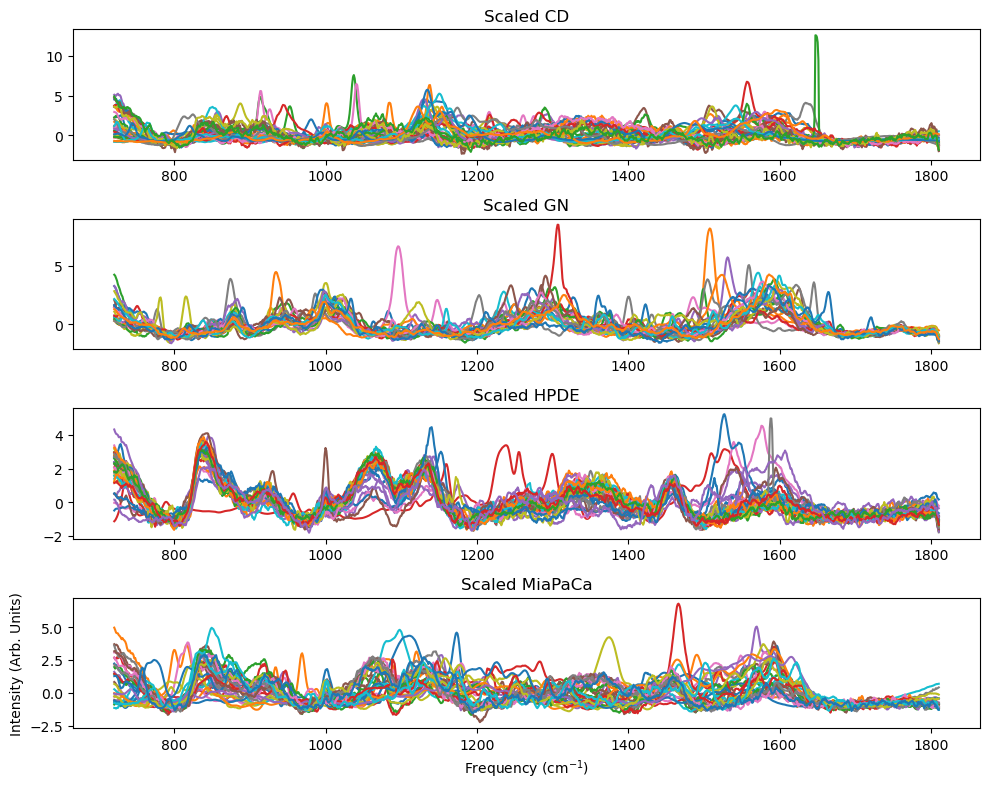

In [280]:
fig, ax = plt.subplots(4,1,figsize=(10,8))
ax[0].plot(df_average.Raman.Frequency, df_scaled_CD[:])
ax[0].set_title('Scaled CD')
ax[1].plot(df_average.Raman.Frequency, df_scaled_GN[:])
ax[1].set_title('Scaled GN')
ax[2].plot(df_average.Raman.Frequency, df_scaled_HPDE[:])
ax[2].set_title('Scaled HPDE')
ax[3].plot(df_average.Raman.Frequency, df_scaled_MiaPaCa[:])
ax[3].set_title('Scaled MiaPaCa')
plt.ylabel('Intensity (Arb. Units)')
plt.xlabel('Frequency (cm$^{-1}$)')
plt.tight_layout()
plt.show()

It appears that the spectra do not need much cleaning from here. We will use the scaled spectra to move forward and reduce the dimension by applying PCA. However, we might need to create a label and concatenate all of the spectra of different cells. 

In [281]:
df = pd.concat([df_scaled_CD,df_scaled_GN,df_scaled_HPDE,df_scaled_MiaPaCa],axis=1).reset_index()
df.drop('index',axis=1,inplace=True)
print(df.shape)
df.head(200)

(1013, 121)


,CD_scaled_0,CD_scaled_1,CD_scaled_2,CD_scaled_3,CD_scaled_4,CD_scaled_5,CD_scaled_6,CD_scaled_7,CD_scaled_8,CD_scaled_9,...,MiaPaCa_scaled_21,MiaPaCa_scaled_22,MiaPaCa_scaled_23,MiaPaCa_scaled_24,MiaPaCa_scaled_25,MiaPaCa_scaled_26,MiaPaCa_scaled_27,MiaPaCa_scaled_28,MiaPaCa_scaled_29,MiaPaCa_scaled_30
0,0.544890,-0.803976,0.580486,-0.284544,0.951922,1.171875,0.859946,0.117320,-0.017348,-0.833708,...,-0.034115,1.415905,1.455756,-0.078448,3.162044,2.679886,2.129003,-0.261592,-0.769948,1.266487
1,0.486031,-0.757946,0.422489,-0.289928,0.876549,1.101364,0.934400,0.049795,-0.011968,-0.836117,...,-0.060101,1.349793,1.395624,-0.094257,3.189273,2.543733,2.073219,-0.317903,-0.788373,1.286535
2,0.504072,-0.729041,0.117898,-0.273608,0.795501,1.084714,1.061655,0.024158,-0.046767,-0.853397,...,-0.079730,1.351175,1.323308,-0.112559,3.036901,2.501903,2.012246,-0.280749,-0.877399,1.292390
3,0.497984,-0.714085,-0.109961,-0.283588,0.748358,0.991662,1.127355,-0.111128,-0.060305,-0.851067,...,-0.094101,1.305004,1.281904,-0.115781,3.013851,2.338906,1.941912,-0.317927,-0.825410,1.185780
4,0.211190,-0.695870,-0.257283,-0.281549,0.596884,1.057551,1.110658,-0.195160,-0.077421,-0.846064,...,-0.108735,1.188868,1.177508,-0.113850,3.011169,2.202445,1.800809,-0.421874,-0.803173,1.083188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.893031,-0.421444,3.289723,-0.411183,-0.731459,-0.291710,-0.487217,-0.201324,-0.602747,-0.189978,...,-0.520487,-0.090672,-0.583555,-0.818062,-0.747619,-0.013379,-0.688681,-0.605225,-0.406731,-0.300218
196,-0.801298,-0.385343,3.583743,-0.450027,-0.745795,-0.324891,-0.542334,-0.164296,-0.693464,-0.152620,...,-0.517873,-0.085111,-0.515748,-0.840648,-0.945677,-0.202091,-0.665073,-0.524072,-0.537870,-0.556224
197,-0.685285,-0.265187,3.652794,-0.456610,-0.811388,-0.319551,-0.589782,-0.192672,-0.738451,-0.127901,...,-0.530992,0.058748,-0.427158,-0.861757,-0.972070,-0.289541,-0.645025,-0.452875,-0.648226,-0.557838
198,-0.692354,-0.209580,3.485891,-0.449744,-0.828974,-0.311102,-0.623126,-0.175801,-0.779504,-0.124896,...,-0.542873,0.060938,-0.395398,-0.893249,-0.867037,-0.316119,-0.642546,-0.592518,-0.767308,-0.511896


Now we can create a label for these concatenated df for classification.

In [282]:
cd_obs = df_scaled_CD.shape[1]
GN_obs = df_scaled_GN.shape[1]
HPDE_obs = df_scaled_HPDE.shape[1]
MiaPaCa_obs = df_scaled_MiaPaCa.shape[1]
y = {}
for i in range(cd_obs):
    name = 'CD_scaled_' + str(i)
    y[name] = 0
for i in range(GN_obs):
    name = 'GN_scaled_' + str(i)
    y[name] = 1
for i in range(HPDE_obs):
    name = 'HPDE_scaled_' + str(i)
    y[name] = 2
for i in range(MiaPaCa_obs):
    name = 'MiaPaCa_scaled_' + str(i)
    y[name] = 3
y = pd.DataFrame.from_dict(y,orient='index',columns=['Target'])
y.shape

(121, 1)

In [283]:
y.head()

,Target
CD_scaled_0,0
CD_scaled_1,0
CD_scaled_2,0
CD_scaled_3,0
CD_scaled_4,0


Then we can merge this to the main df.

In [284]:
df_master = pd.concat([df.T,y],axis=1,ignore_index=False)

In [285]:
df_master

,0,1,2,3,4,5,6,7,8,9,...,1004,1005,1006,1007,1008,1009,1010,1011,1012,Target
CD_scaled_0,0.544890,0.486031,0.504072,0.497984,0.211190,0.085117,-0.011104,-0.244996,-0.269232,-0.100159,...,0.234435,0.293614,0.287794,0.218139,0.202670,0.143649,-0.188851,-0.338167,-0.343832,0
CD_scaled_1,-0.803976,-0.757946,-0.729041,-0.714085,-0.695870,-0.695353,-0.768268,-0.823698,-0.867106,-0.903477,...,-0.429063,-0.413083,-0.404201,-0.431803,-0.452528,-0.496689,-0.571386,-0.594077,-0.610955,0
CD_scaled_2,0.580486,0.422489,0.117898,-0.109961,-0.257283,-0.344626,-0.403054,-0.445152,-0.461131,-0.471701,...,-0.624187,-0.628112,-0.636051,-0.642628,-0.646459,-0.653747,-0.673928,-0.681869,-0.695268,0
CD_scaled_3,-0.284544,-0.289928,-0.273608,-0.283588,-0.281549,-0.298788,-0.296297,-0.344452,-0.392090,-0.373874,...,0.202230,0.179256,0.182211,0.202127,0.219839,0.230545,0.105348,0.095563,0.021590,0
CD_scaled_4,0.951922,0.876549,0.795501,0.748358,0.596884,0.605710,0.579334,0.585846,0.485756,0.532293,...,-0.673613,-0.711815,-0.719791,-0.655058,-0.607814,-0.677480,-0.896293,-0.905580,-1.059267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiaPaCa_scaled_26,2.679886,2.543733,2.501903,2.338906,2.202445,2.012167,2.038291,2.055618,2.057747,2.089668,...,-1.038924,-0.871064,-0.831789,-0.792699,-0.814054,-0.847574,-1.017860,-1.033726,-1.074580,3
MiaPaCa_scaled_27,2.129003,2.073219,2.012246,1.941912,1.800809,1.691090,1.653938,1.576651,1.452387,1.455146,...,-0.815540,-0.797810,-0.699646,-0.699399,-0.792807,-0.673847,-0.840130,-0.843650,-0.801993,3
MiaPaCa_scaled_28,-0.261592,-0.317903,-0.280749,-0.317927,-0.421874,-0.358944,-0.403064,-0.504370,-0.726259,-0.746632,...,-0.429636,-0.443264,-0.500121,-0.559249,-0.489456,-0.431647,-0.500564,-0.501574,-0.445481,3
MiaPaCa_scaled_29,-0.769948,-0.788373,-0.877399,-0.825410,-0.803173,-0.862064,-0.846209,-0.797101,-0.837419,-0.887668,...,-0.768990,-0.643993,-0.655699,-0.694486,-0.677776,-0.715158,-1.061388,-1.113616,-1.302723,3


The author uses PCA to reduce the dimension and has reported values of variance and plots that we can compare. Let us see whether we can reproduce their findings.

In [286]:
from sklearn.decomposition import PCA
df_master.columns = df_master.columns.astype(str)
pca_df = PCA().fit(df_master)
#pca_df = PCA().fit(df_master.drop(columns='Target'))

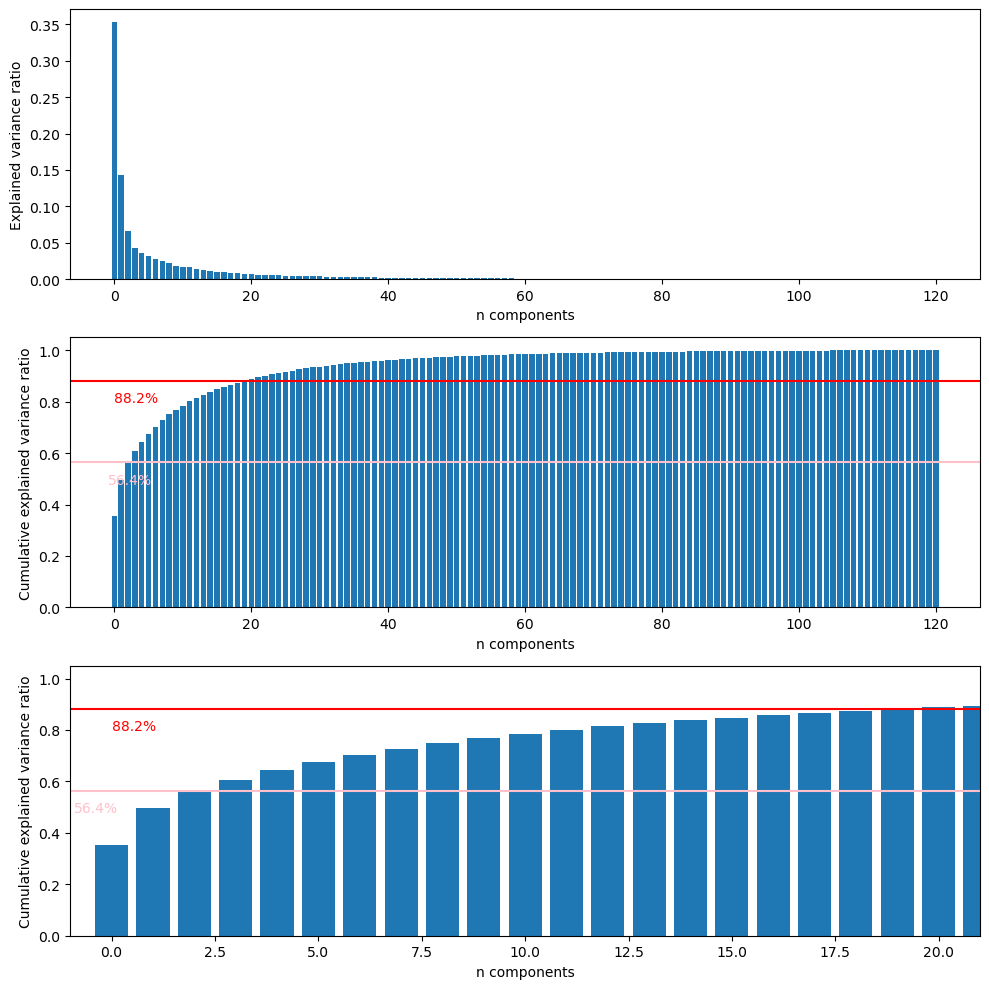

In [287]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_)
ax[1].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[0].set_xlabel('n components')
ax[0].set_ylabel('Explained variance ratio')
ax[1].set_xlabel('n components')
ax[1].set_ylabel('Cumulative explained variance ratio')
ax[1].axhline(0.882,c='r')
ax[1].text(0,0.8,'88.2%',c='r')
ax[1].axhline(0.564,c='pink')
ax[1].text(-0.9,0.48,'56.4%',c='pink')

ax[2].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[2].set_xlabel('n components')
ax[2].set_ylabel('Cumulative explained variance ratio')
ax[2].axhline(0.882,c='r')
ax[2].text(0,0.8,'88.2%',c='r')
ax[2].axhline(0.564,c='pink')
ax[2].text(-0.9,0.48,'56.4%',c='pink')
ax[2].set_xlim(-1,21)
plt.tight_layout()
plt.show()

This PCA fitting and explained variance ratio results verifies the author's results as well. The first three of PC explains 56.4% of the total variance and 20 PCs explains 88.2% of the total variance. 

In [288]:
pca_df = PCA(n_components=20).fit(df_master.drop(columns='Target'))

In [289]:
X = pca_df.transform(df_master.drop(columns='Target'))

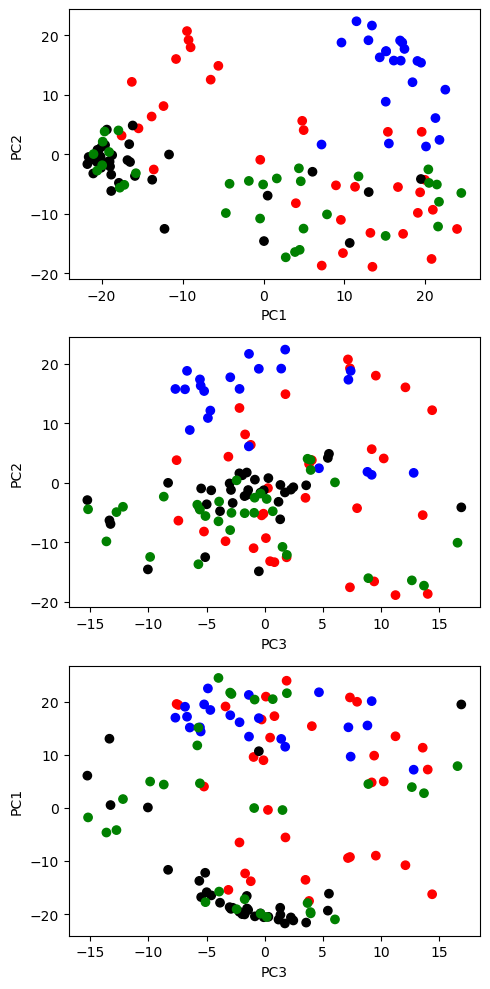

In [290]:
PC1 = X[:,0]
PC2 = X[:,1]
PC3 = X[:,2]

fig, ax = plt.subplots(3,1,figsize=(5,10))
ax[0].scatter(PC1,PC2,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].scatter(PC3,PC2,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1].set_xlabel('PC3')
ax[1].set_ylabel('PC2')
ax[2].scatter(PC3,PC1,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2].set_xlabel('PC3')
ax[2].set_ylabel('PC1')
plt.tight_layout()
plt.show()

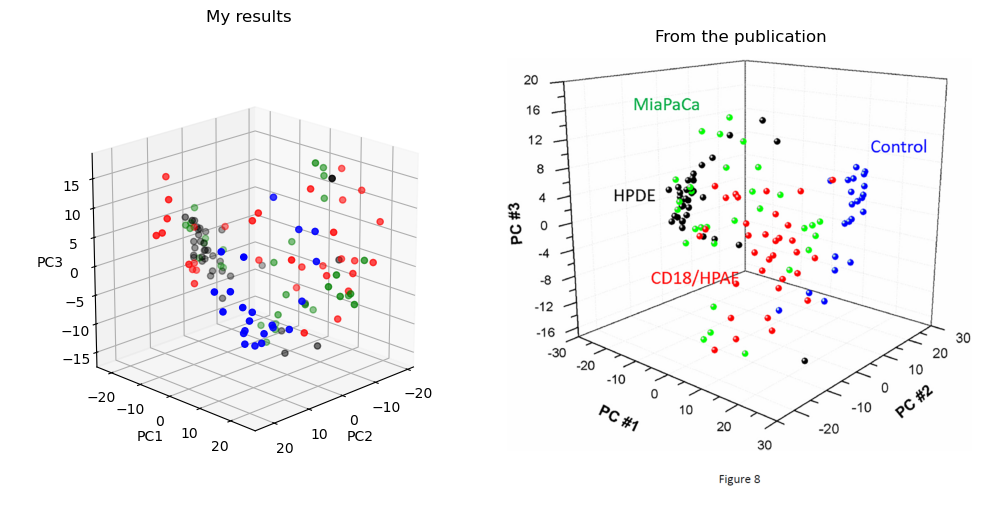

In [291]:
from PIL import Image

PC_fig = Image.open('Data\PC_fig.PNG')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(PC2,PC1,PC3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax.set(xlabel=('PC2'), ylabel=('PC1'), zlabel=('PC3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=0.8)
ax.view_init(elev=20, azim=45)
ax.set_title('My results')

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(PC_fig)
ax1.axis(False)
ax1.set_title('From the publication')
plt.show()

These plots do not seem to agree with the results in the paper. However, the explained variance ratio is perfectly matched, evidenced by their statistical variance description of PC#1, 2, and 3 corresponding to my results.

Now we can try LDA approach to compare the PC-DFA predictive results from the paper. 

In [292]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_master.drop('Target',axis=1),df_master.Target,test_size=0.3,stratify=df_master.Target)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [293]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,y_train.to_numpy().ravel())
score = lda_model.score(X_test,y_test.to_numpy().ravel())
print(score)

0.8918918918918919


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(


cross-validation scores:  [1.  1.  0.6 1.  1.  1.  0.8 1.  0.8 0.8 0.8 1.  1.  0.8 1.  1.  0.8 1.
 0.8 0.8 1.  0.8 0.8 1. ]
mean cross-validation score:  0.9
Specificity: 
      label  specificity
0       CD     0.954545
1       GN     1.000000
2     HPDE     0.930233
3  MiaPaCa     0.977778
Sensitivity: 
      label  sensitivity
0       CD     0.939394
1       GN     1.000000
2     HPDE     0.971429
3  MiaPaCa     0.709677
Overall Specificity: 
 specificity    0.965639
dtype: float64
Overall Sensitivity: 
 sensitivity    0.905125
dtype: float64


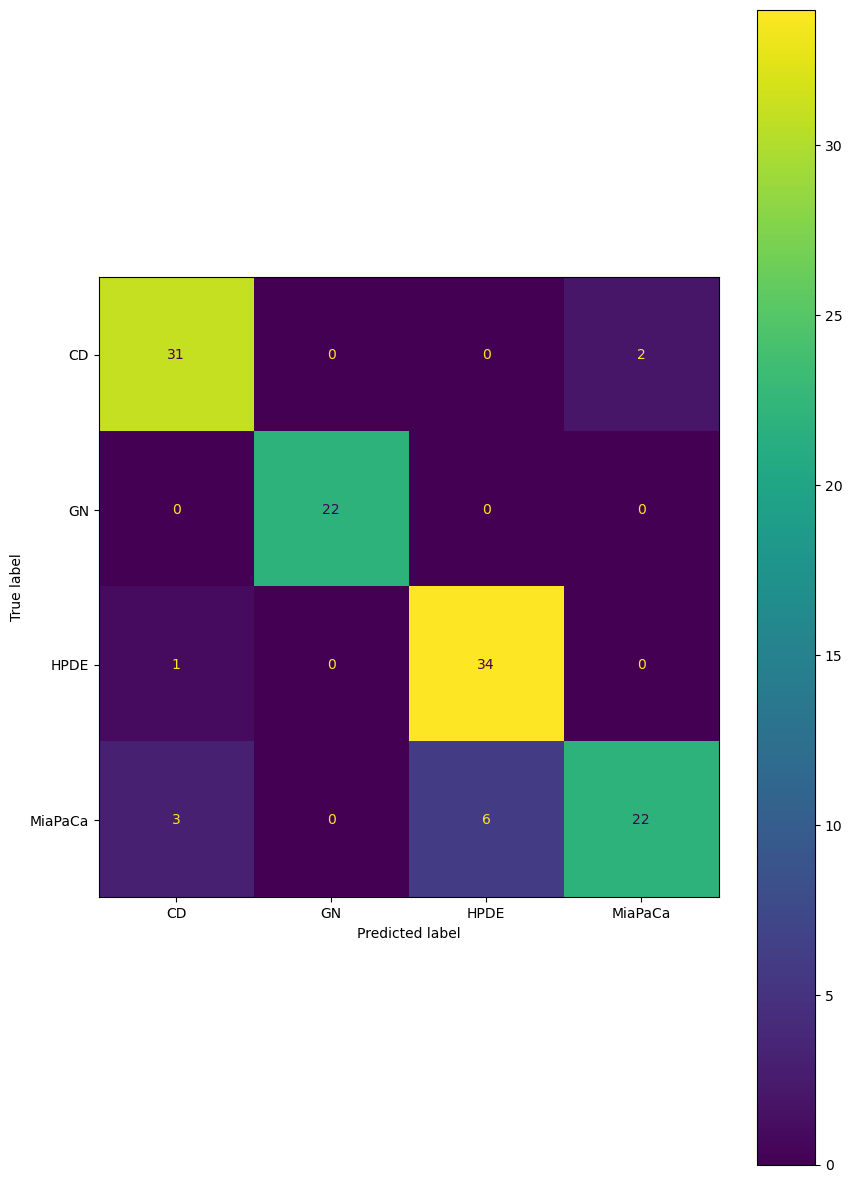

In [312]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

split = 24
scores = cross_val_score(lda, X, y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(lda, X, y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred,labels=[0,1,2,3])


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

In [313]:
X_lda = lda.fit_transform(X,y.to_numpy().ravel())

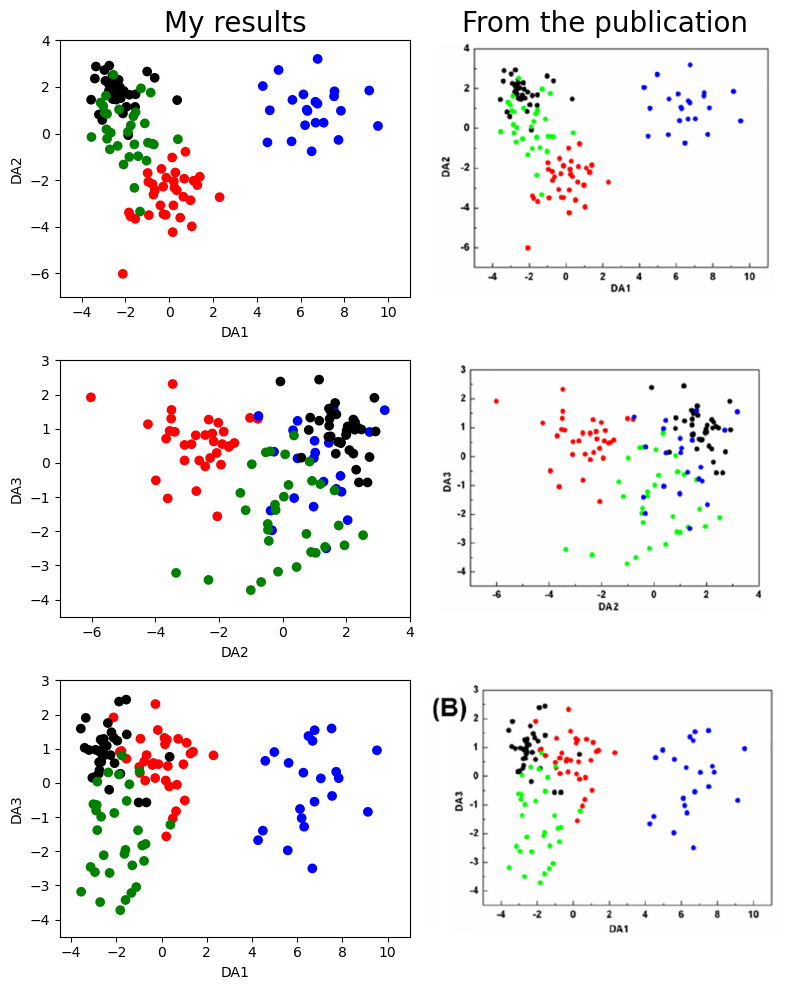

In [318]:
DA12_pubfig = Image.open('Data\DA12.PNG')
DA23_pubfig = Image.open('Data\DA23.PNG')
DA13_pubfig = Image.open('Data\DA13.PNG')

# multiplied by -1 just to reproduce and match their findings.
DA1 = X_lda[:,0]*-1
DA2 = X_lda[:,1]
DA3 = X_lda[:,2]

fig, ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].set_title('My results',fontsize=20)
ax[0,1].set_title('From the publication',fontsize=20)
ax[0,0].scatter(DA1,DA2,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0,0].set_xlabel('DA1')
ax[0,0].set_ylabel('DA2')
ax[0,0].set_xlim(-5,11)
ax[0,0].set_ylim(-7,4)
ax[0,1].imshow(DA12_pubfig)
ax[0,1].axis('off')

ax[1,0].scatter(DA2,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1,0].set_xlabel('DA2')
ax[1,0].set_ylabel('DA3')
ax[1,0].set_xlim(-7,4)
ax[1,0].set_ylim(-4.5,3)
ax[1,1].imshow(DA23_pubfig)
ax[1,1].axis('off')

ax[2,0].scatter(DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2,0].set_xlabel('DA1')
ax[2,0].set_ylabel('DA3')
ax[2,0].set_xlim(-4.5,11)
ax[2,0].set_ylim(-4.5,3)
ax[2,1].imshow(DA13_pubfig)
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

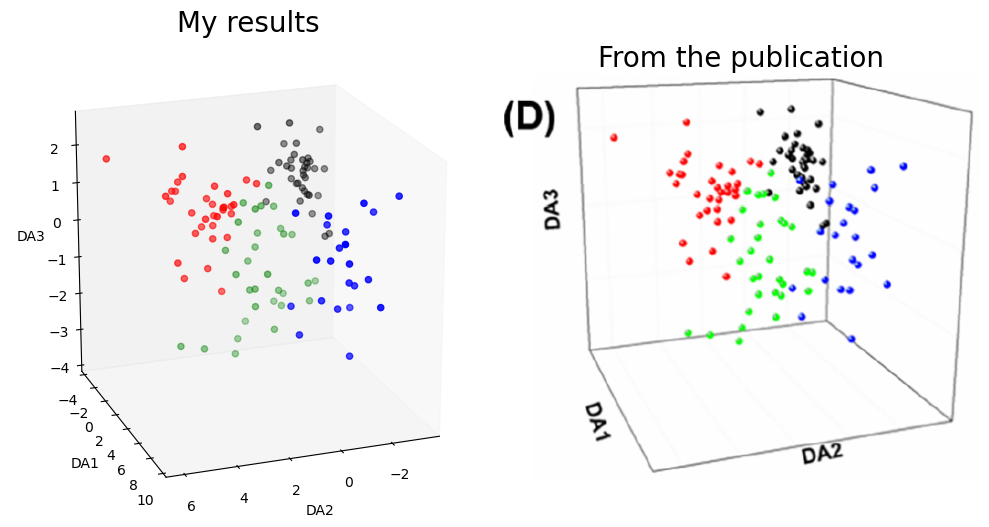

In [321]:
DA123_pubfig = Image.open('Data\DA123.PNG')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(DA2*-1,DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
# multiplied by -1 just to reproduce and match their findings.
ax.set(xlabel=('DA2'), ylabel=('DA1'), zlabel=('DA3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=1)
ax.view_init(elev=20, azim=70)
ax.grid(False)
ax.set_title('My results',fontsize=20)

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(DA123_pubfig)
ax1.axis(False)
ax1.set_title('From the publication',fontsize=20)
plt.show()

It looks like we can reproduce their results really well. It is bang on. Perfect. <br></br>

Now we can move on to the healthy control and early pancreatic cancer cells. The idea is that if it predicts GN (the control), then it is healthy. If others, it is unhealthy. 

I wonder what would LDA results give without using PCA since LDA also reduces dimension as well. We can find out.

In [324]:
X_train_noPCA, X_test_noPCA, y_train_noPCA, y_test_noPCA = train_test_split(df_master.drop(columns=['Target']),y,test_size=0.3)

lda = LinearDiscriminantAnalysis()
lda_noPCA_model = lda.fit(X_train_noPCA,y_train_noPCA.to_numpy().ravel())
score = lda_noPCA_model.score(X_test_noPCA,y_test_noPCA.to_numpy().ravel())
print(score)

X_lda_noPCA = lda_noPCA_model.transform(df_master.drop(columns=['Target']))

0.8378378378378378


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(


cross-validation scores:  [0.83333333 0.6        1.         1.         1.         1.
 0.6        0.8        0.8        0.8        0.6        1.
 0.8        0.8        0.8        1.         1.         0.8
 0.6        1.         1.         1.         1.         0.6       ]
mean cross-validation score:  0.8513888888888889


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(


Specificity: 
      label  specificity
0       CD     0.943182
1       GN     1.000000
2     HPDE     0.918605
3  MiaPaCa     0.933333
Sensitivity: 
      label  sensitivity
0       CD     0.787879
1       GN     1.000000
2     HPDE     0.914286
3  MiaPaCa     0.741935
Overall Specificity: 
 specificity    0.94878
dtype: float64
Overall Sensitivity: 
 sensitivity    0.861025
dtype: float64


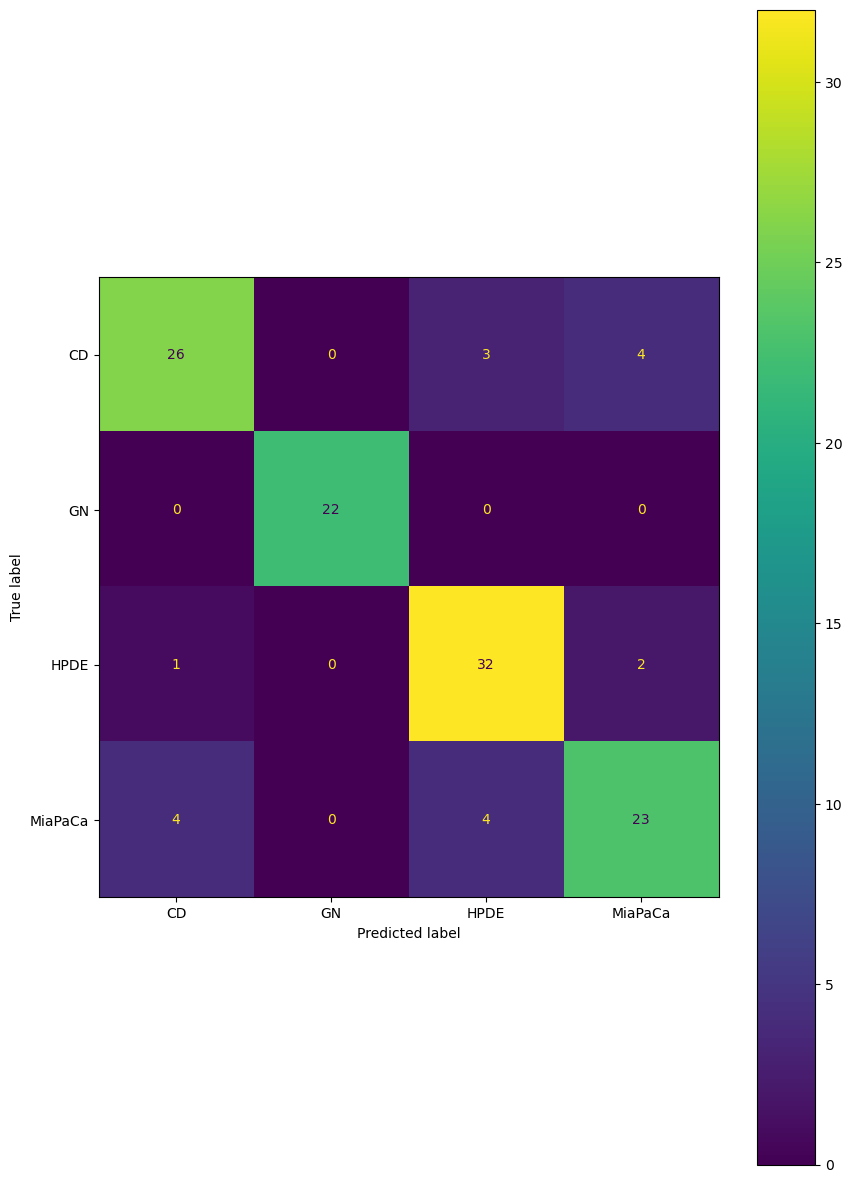

In [347]:
split=24

scores = cross_val_score(lda, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(lda, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred)


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')

print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

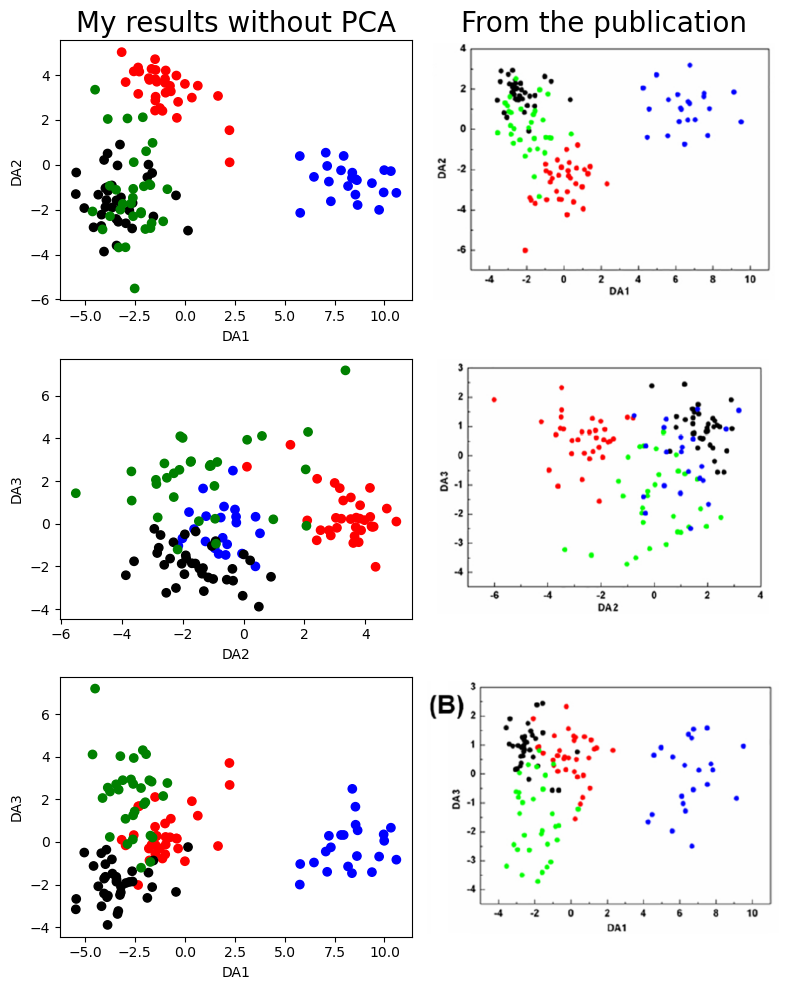

In [348]:
DA1 = X_lda_noPCA[:,0]
DA2 = X_lda_noPCA[:,1]
DA3 = X_lda_noPCA[:,2]

fig, ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].set_title('My results without PCA',fontsize=20)
ax[0,1].set_title('From the publication',fontsize=20)
ax[0,0].scatter(DA1,DA2*-1,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0,0].set_xlabel('DA1')
ax[0,0].set_ylabel('DA2')
ax[0,1].imshow(DA12_pubfig)
ax[0,1].axis('off')

ax[1,0].scatter(DA2*-1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1,0].set_xlabel('DA2')
ax[1,0].set_ylabel('DA3')
ax[1,1].imshow(DA23_pubfig)
ax[1,1].axis('off')

ax[2,0].scatter(DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2,0].set_xlabel('DA1')
ax[2,0].set_ylabel('DA3')
ax[2,1].imshow(DA13_pubfig)
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

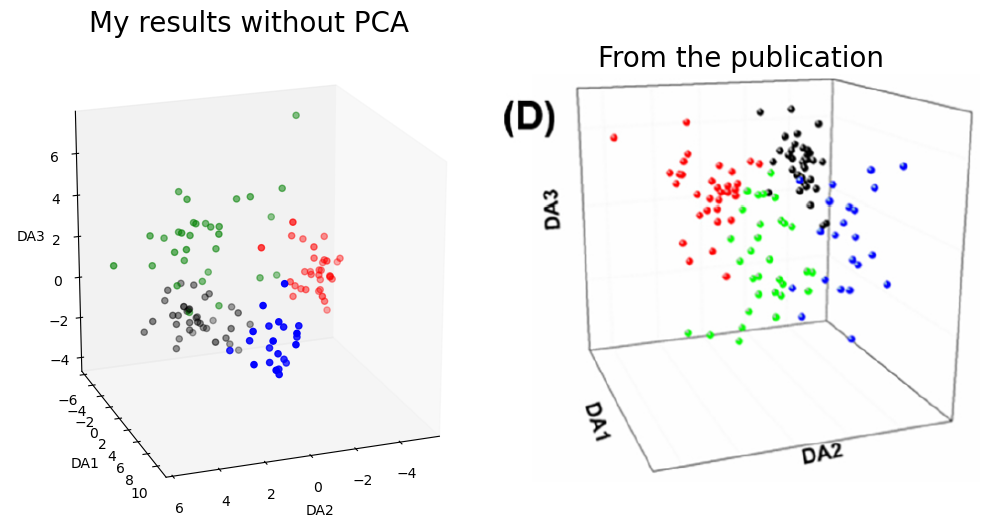

In [349]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(DA2,DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax.set(xlabel=('DA2'), ylabel=('DA1'), zlabel=('DA3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=1)
ax.view_init(elev=20, azim=70)
ax.grid(False)
ax.set_title('My results without PCA',fontsize=20)

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(DA123_pubfig)
ax1.axis(False)
ax1.set_title('From the publication',fontsize=20)
plt.show()

We can use different models to experiment whether we can increase the accuracy, specificity, and sensitivity.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,100,200],
    'max_features': ["sqrt", "log2",None],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid,cv=8)
CV_rf.fit(X_train, y_train.to_numpy().ravel())
CV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [388]:
rf = RandomForestClassifier(n_estimators=CV_rf.best_params_['n_estimators'],
                            max_features=CV_rf.best_params_['max_features'],
                            max_depth=CV_rf.best_params_['max_depth'],
                            criterion=CV_rf.best_params_['criterion'])
rf.fit(X_train, y_train.to_numpy().ravel())
rf.score(X_test,y_test)

0.8108108108108109

cross-validation scores:  [1.         0.5        0.83333333 0.83333333 0.66666667 1.
 0.66666667 0.83333333 0.66666667 0.66666667 0.66666667 0.83333333
 1.         0.83333333 1.         0.66666667 1.         0.6
 1.         0.8        0.6       ]
mean cross-validation score:  0.7936507936507937
Specificity: 
      label  specificity
0       CD     0.897727
1       GN     0.989899
2     HPDE     0.976744
3  MiaPaCa     0.866667
Sensitivity: 
      label  sensitivity
0       CD     0.757576
1       GN     0.909091
2     HPDE     0.800000
3  MiaPaCa     0.774194
Overall Specificity: 
 specificity    0.932759
dtype: float64
Overall Sensitivity: 
 sensitivity    0.810215
dtype: float64


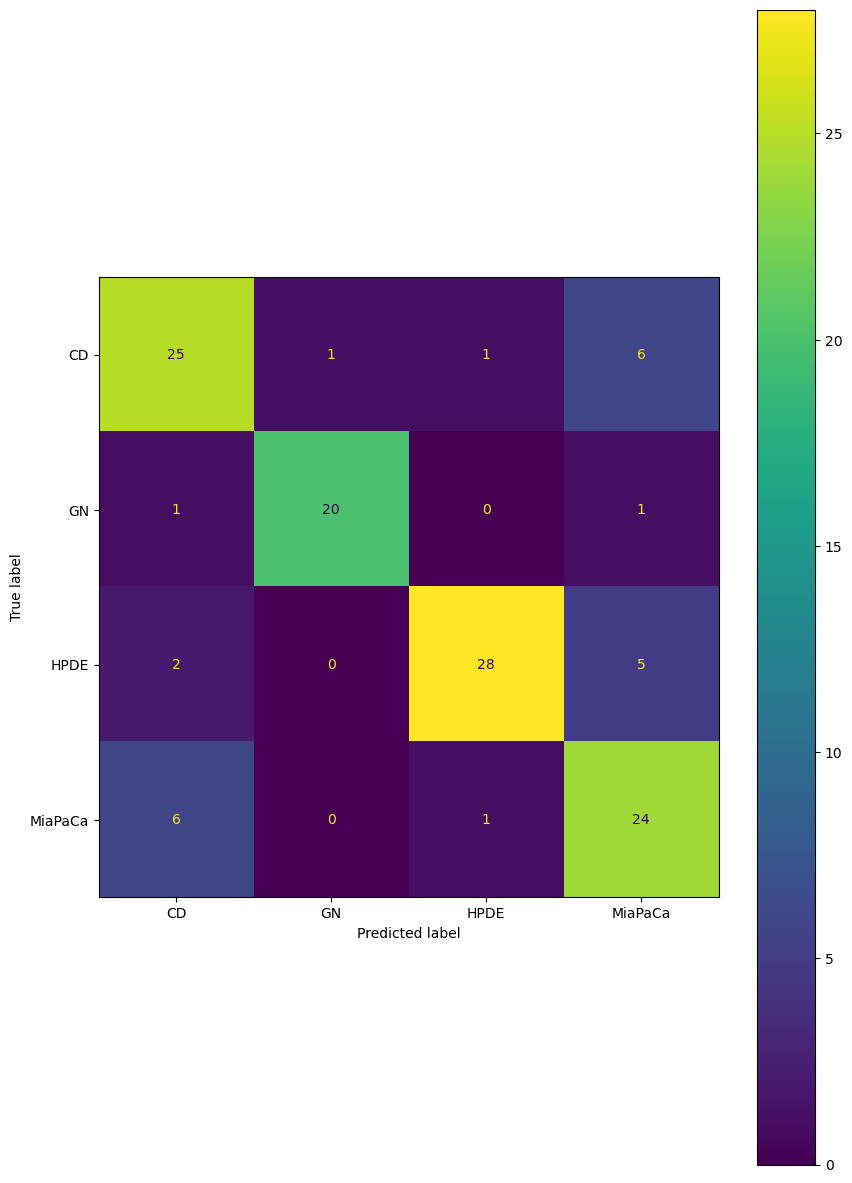

In [375]:
split = 21

scores = cross_val_score(rf, X, y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(rf, X, y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred,labels=[0,1,2,3])


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

The random forest classifier model does not score well. LDA seems to perform better with higher accuracy and shorter latency.

cross-validation scores:  [0.83333333 1.         1.         1.         0.66666667 1.
 0.66666667 0.66666667 0.66666667 0.83333333 0.66666667 0.5
 0.83333333 0.83333333 0.66666667 0.83333333 0.8        0.8
 1.         1.         0.8       ]
mean cross-validation score:  0.8126984126984127
Specificity: 
      label  specificity
0       CD     0.863636
1       GN     1.000000
2     HPDE     0.930233
3  MiaPaCa     0.977778
Sensitivity: 
      label  sensitivity
0       CD     0.909091
1       GN     0.954545
2     HPDE     0.914286
3  MiaPaCa     0.580645
Overall Specificity: 
 specificity    0.942912
dtype: float64
Overall Sensitivity: 
 sensitivity    0.839642
dtype: float64


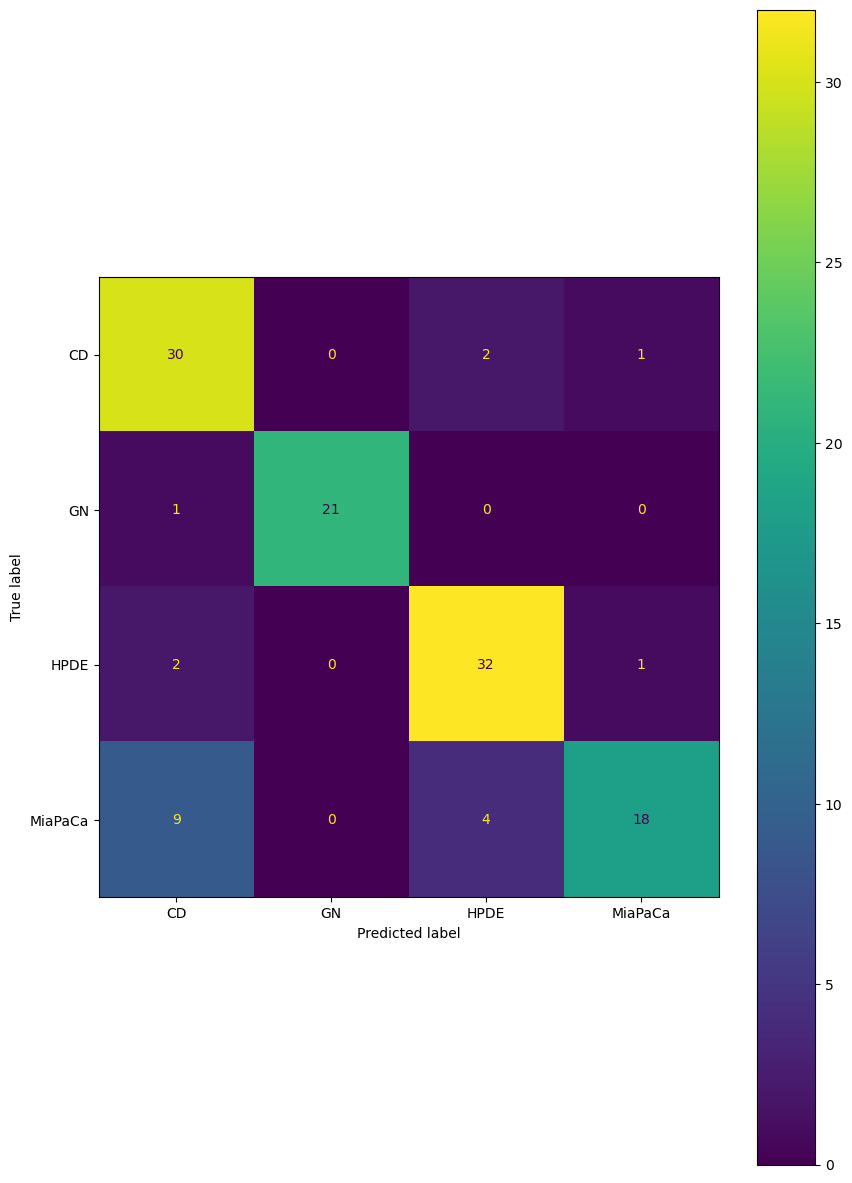

In [389]:
split = 21

scores = cross_val_score(rf, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(rf, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred,labels=[0,1,2,3])


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

In [356]:
import torch
from torch import nn

In [357]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [455]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(20, 30),
            #nn.ReLU(),
            nn.Linear(30,30),
            nn.Linear(30, 10),
            #nn.ReLU(),
            nn.Linear(10, 4),
            nn.Softmax()
        )

    def forward(self, x):
        x = torch.from_numpy(x).to(torch.float32)
        logits = self.linear_relu_stack(x)
        return logits

def train_loop(X, y, model, epoch, batch, loss_fn, optimizer, printFn=True):
    model.train()
    
    y = turnYinto(y)
    y = torch.tensor(y).to(torch.float32)
    
    loss_plot = []
    plotx = []
    counter = 0
    for i in range(epoch):
        for k in range(X.shape[0]):
            # Compute prediction and loss
            pred = model(X[k,:])
            loss = loss_fn(pred, y[k])
    
            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss = loss.item()
            
            if counter % 10 == 0 and printFn==True:
                print('\n')
                print('epoch {}: '.format(i))
                print('-'*100)
                print(f"{k}/{X.shape[0]} ----> loss: {loss:>7f}")
            else:
                pass
            
            loss_plot.append(loss)
            counter += 1
            plotx.append(counter)
    if printFn==True:
        plt.plot(plotx,loss_plot)
        plt.xlabel('loss')
        plt.ylabel('iterations')
        plt.show()
    else:
        pass
    return loss, plotx

def testing(X_test,y_test,model,printFn=True):
    correct = 0
    preds = []
    for i in range(X_test.shape[0]):
        logits = model(X_test[i,:])
        pred_probab = nn.Softmax(dim=0)(logits)
        y_pred = pred_probab.argmax(0)
        preds.append(y_pred)
        if printFn==True:
            print(f"Predicted class: {y_pred}")
            print(f"Actual class: {y_test[i]}")
        else:
            pass
        t = y_test[i]
        t = int(t)
        if y_pred == t:
            correct += 1
        if printFn==True:
            print('accuracy: ', correct/(i+1))
            print('count: ', correct, '/', (i+1))
            print('-'*100, '\n')
        else:
            pass
    print('Accuracy: ', correct/(i+1))

    return correct/(i+1), preds

def turnYinto(y):
    try:
        Y = []
        for i in y.values:
            if i == 0:
                Y.append([1.0,0.0,0.0,0.0])
            elif i == 1:
                Y.append([0.0,1.0,0.0,0.0])
            elif i == 2:
                Y.append([0.0,0.0,1.0,0.0])
            else:
                Y.append([0.0,0.0,0.0,1.0])
        return np.array(Y)
    except:
        Y = []
        for i in y:
            if i == 0:
                Y.append([1.0,0.0,0.0,0.0])
            elif i == 1:
                Y.append([0.0,1.0,0.0,0.0])
            elif i == 2:
                Y.append([0.0,0.0,1.0,0.0])
            else:
                Y.append([0.0,0.0,0.0,1.0])
        return np.array(Y)
    

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
    (5): ReLU()
  )
)


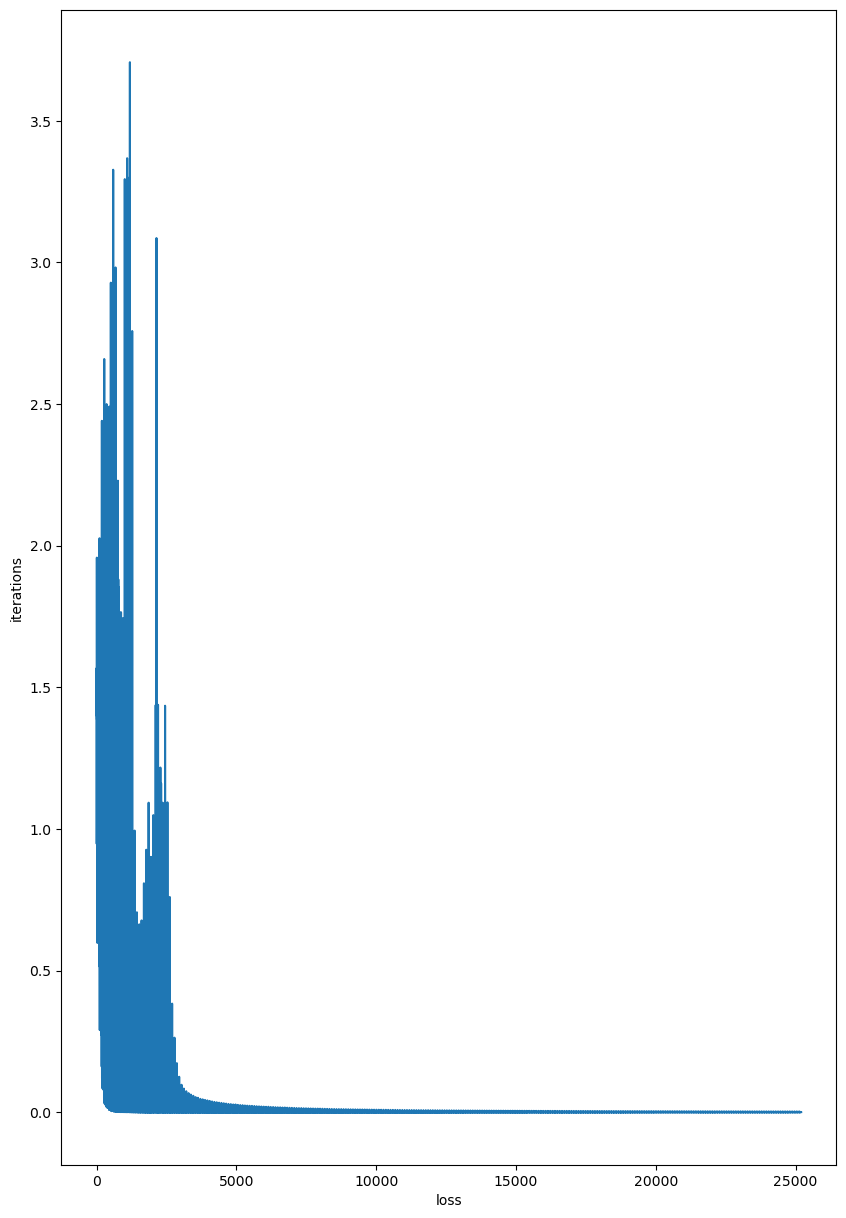

In [327]:
model = NeuralNetwork().to(device)
print(model)

learning_rate = 0.01
epoch = 300
batch = 11

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


loss_count, count = train_loop(X_train, y_train, model, epoch, batch, loss_fn, optimizer, printFn=False)

In [331]:
accuracy = testing(X_test,y_test,printFn=False)
print(accuracy)

0.9459459459459459


C:\Users\brian\AppData\Local\Temp\ipykernel_13656\1737712932.py:68: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  t = int(t)


In [268]:
#torch.save(model.state_dict(), "model.pth")
#print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [337]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))
model.eval()

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
    (5): ReLU()
  )
)

In [338]:
accuracy,preds = testing(X_test,y_test,printFn=False)
print(accuracy)

0.9459459459459459


C:\Users\brian\AppData\Local\Temp\ipykernel_13656\14139588.py:70: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  t = int(t)


Specificity: 
      label  specificity
0       CD     0.962963
1       GN     1.000000
2     HPDE     1.000000
3  MiaPaCa     0.964286
Sensitivity: 
      label  sensitivity
0       CD     0.900000
1       GN     1.000000
2     HPDE     1.000000
3  MiaPaCa     0.888889


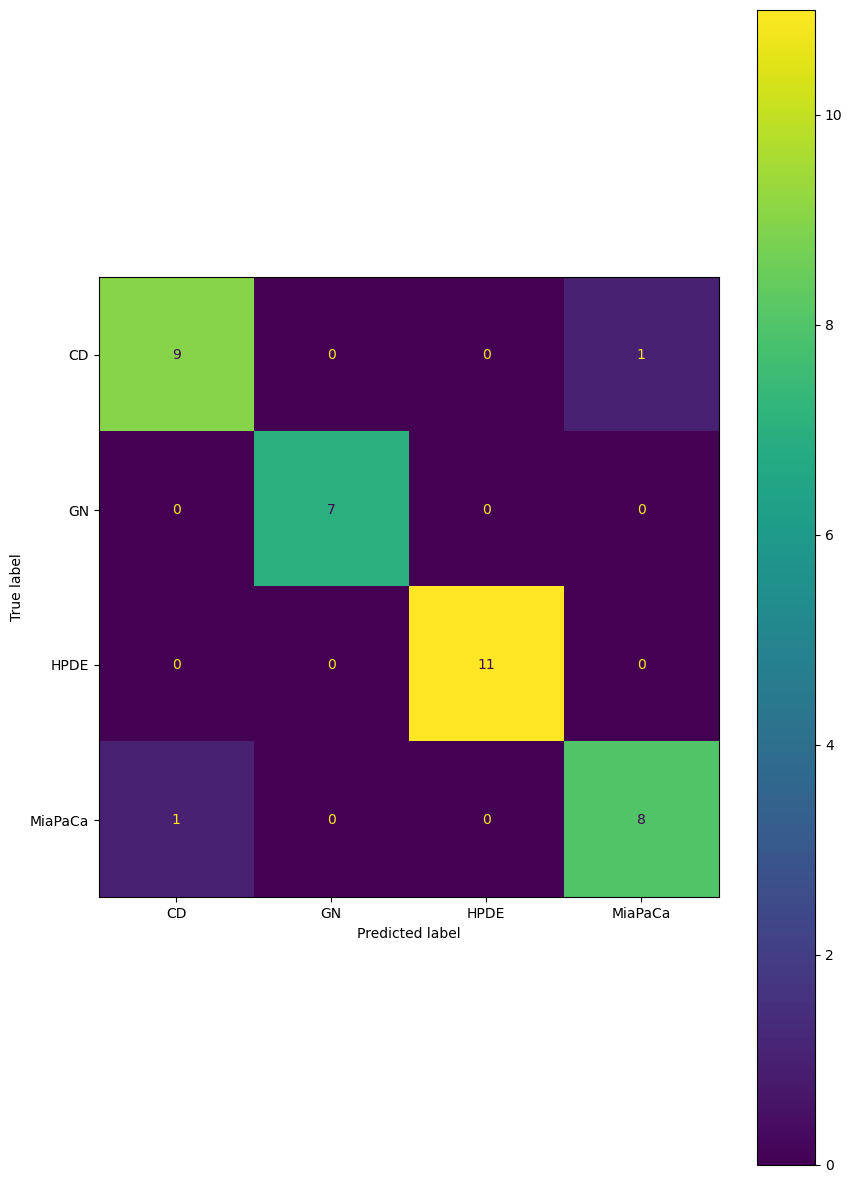

In [382]:
res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                  np.array(preds)==l,
                                                  pos_label=True,average=None)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')

confusion_mat = metrics.confusion_matrix(y_test.values.ravel(), np.array(preds),labels=[0,1,2,3])

print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matr = confusion_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

In [384]:
print('Overall specificity: ', statistics_df['specificity'].mean())
print('Overall sensitivity: ', statistics_df['sensitivity'].mean())

Overall specificity:  0.9818121693121693
Overall sensitivity:  0.9472222222222222


This results display better accuracy, sensitivity, and specificity. <br>
My accuracy: 94% whereas the study's accuracy is 90%. <br>
My specificity: 98% whereas the study's specificity is 97%. <br>
Finally, my sensitivity: 95% whereas the study's sensitivity is 91%.<br>
Overall, the neural network seems to work better!

In [469]:
model = NeuralNetwork().to(device)

In [494]:
model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=30, bias=True)
    (3): Linear(in_features=30, out_features=50, bias=True)
    (4): Linear(in_features=30, out_features=50, bias=True)
    (5): Softmax(dim=1)
  )
)

In [493]:
model.linear_relu_stack.add_module('0',nn.Linear(20,30))
model.linear_relu_stack.add_module('1',nn.Linear(30,50))
model.linear_relu_stack.add_module('2',nn.Linear(50,30))
model.linear_relu_stack.add_module('3',nn.Linear(30,50))
model.linear_relu_stack.add_module('4',nn.Linear(30,50))
model.linear_relu_stack.add_module('5',nn.Softmax(dim=1))

C:\Users\brian\Anaconda3\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


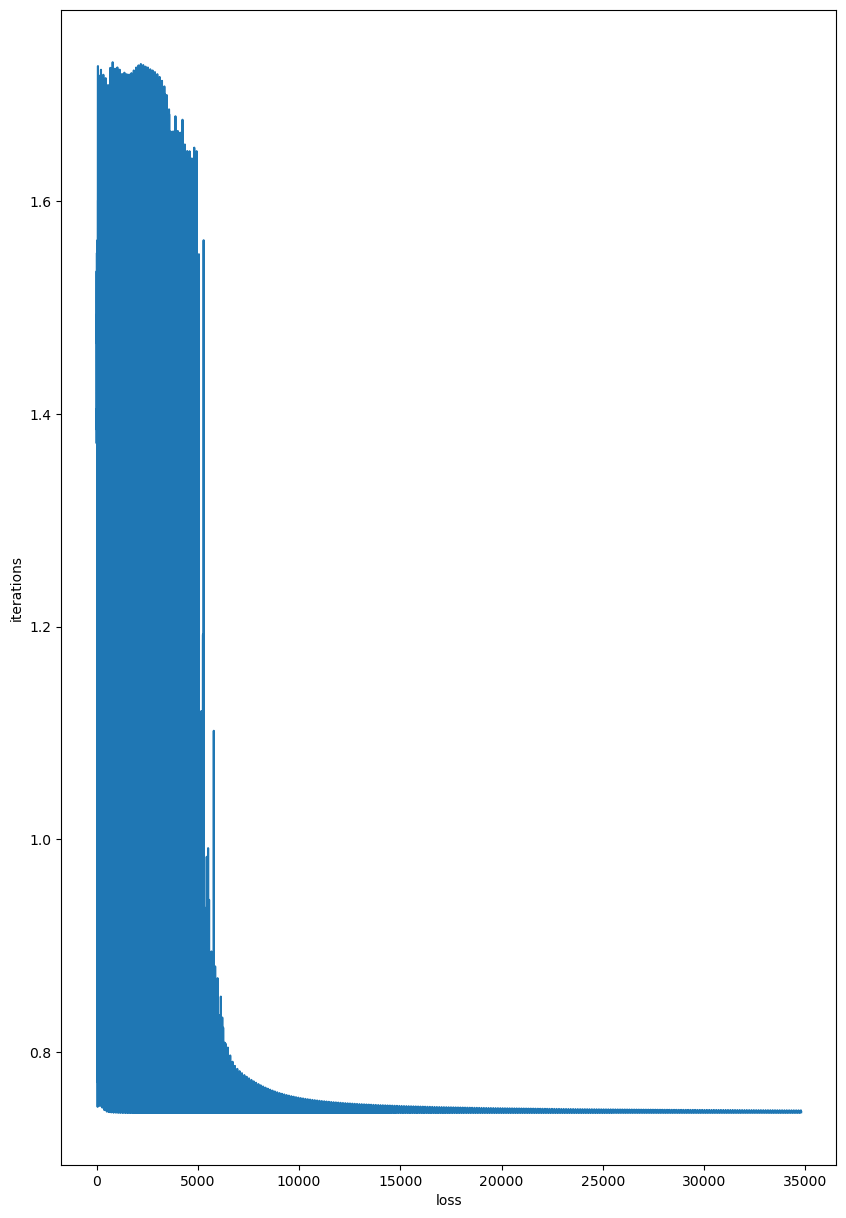

Accuracy:  0.6


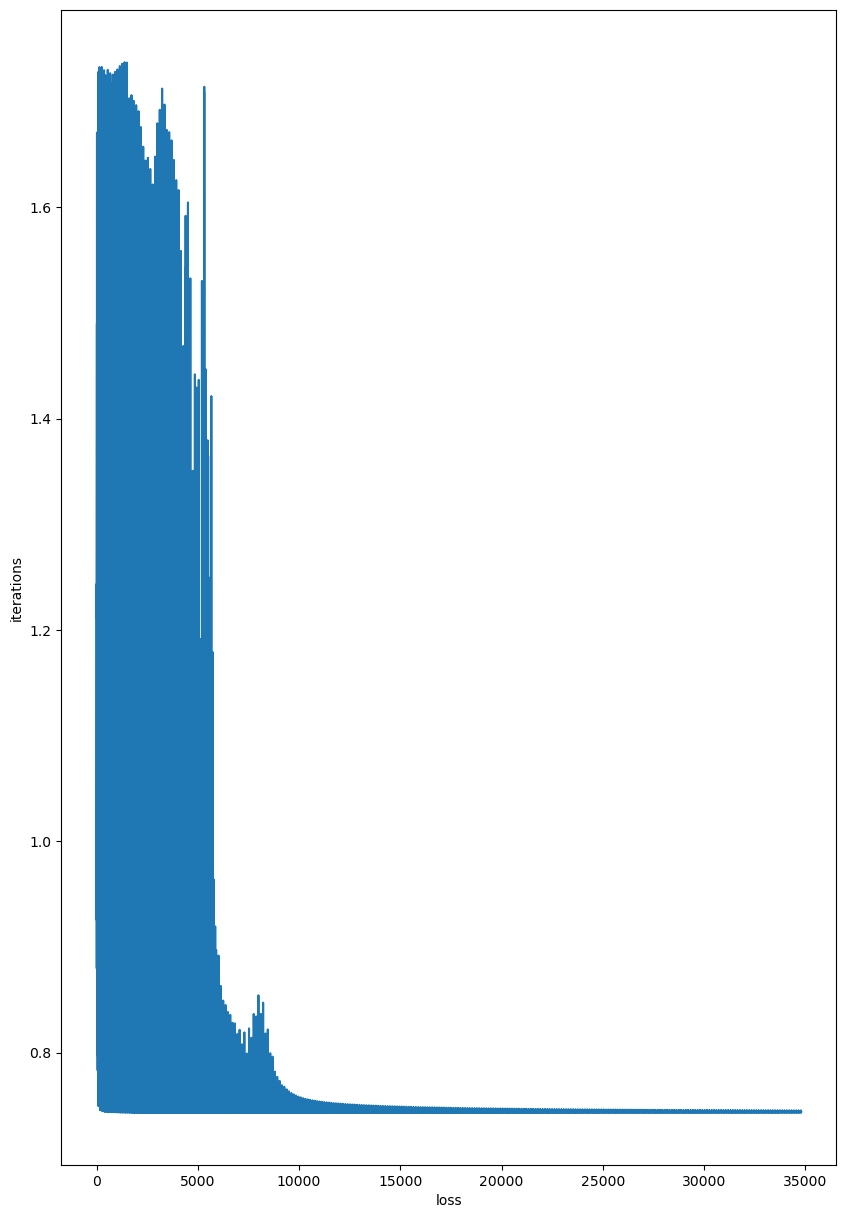

Accuracy:  1.0


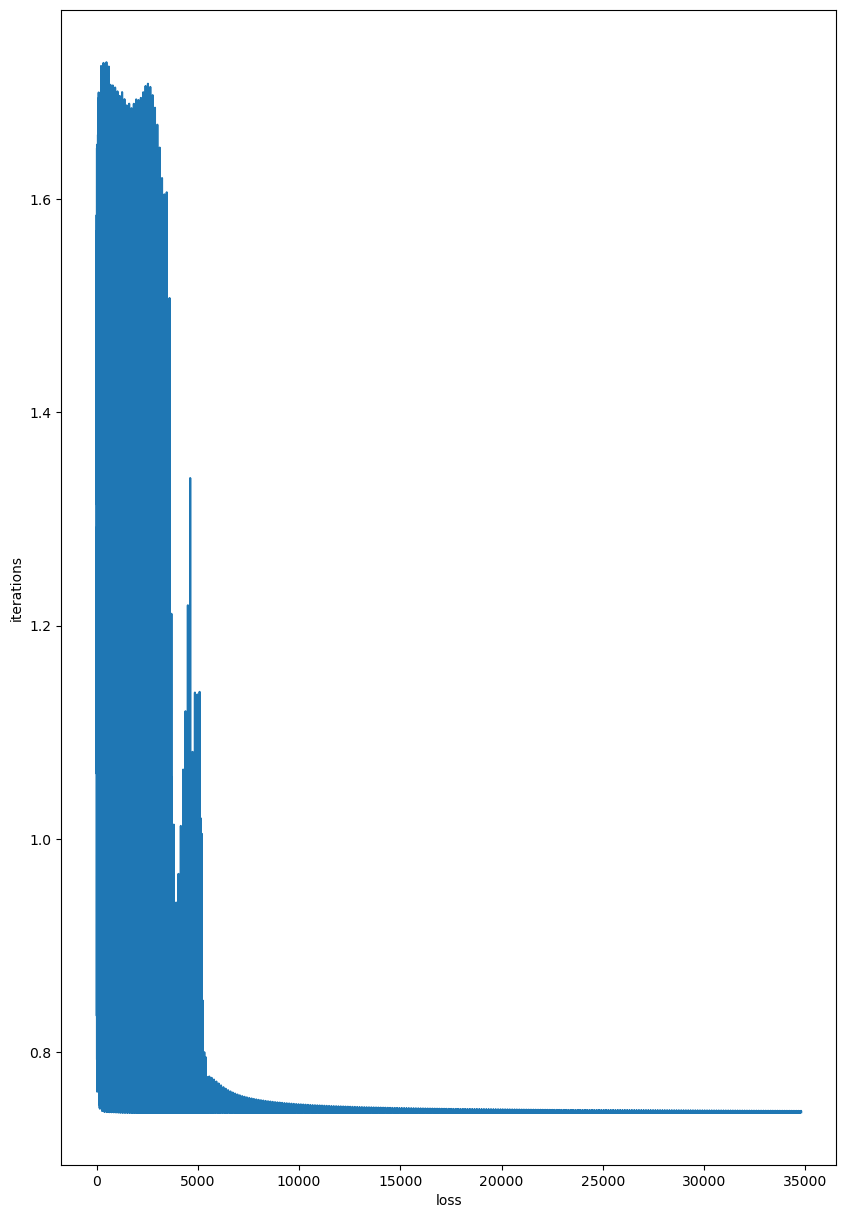

Accuracy:  0.8


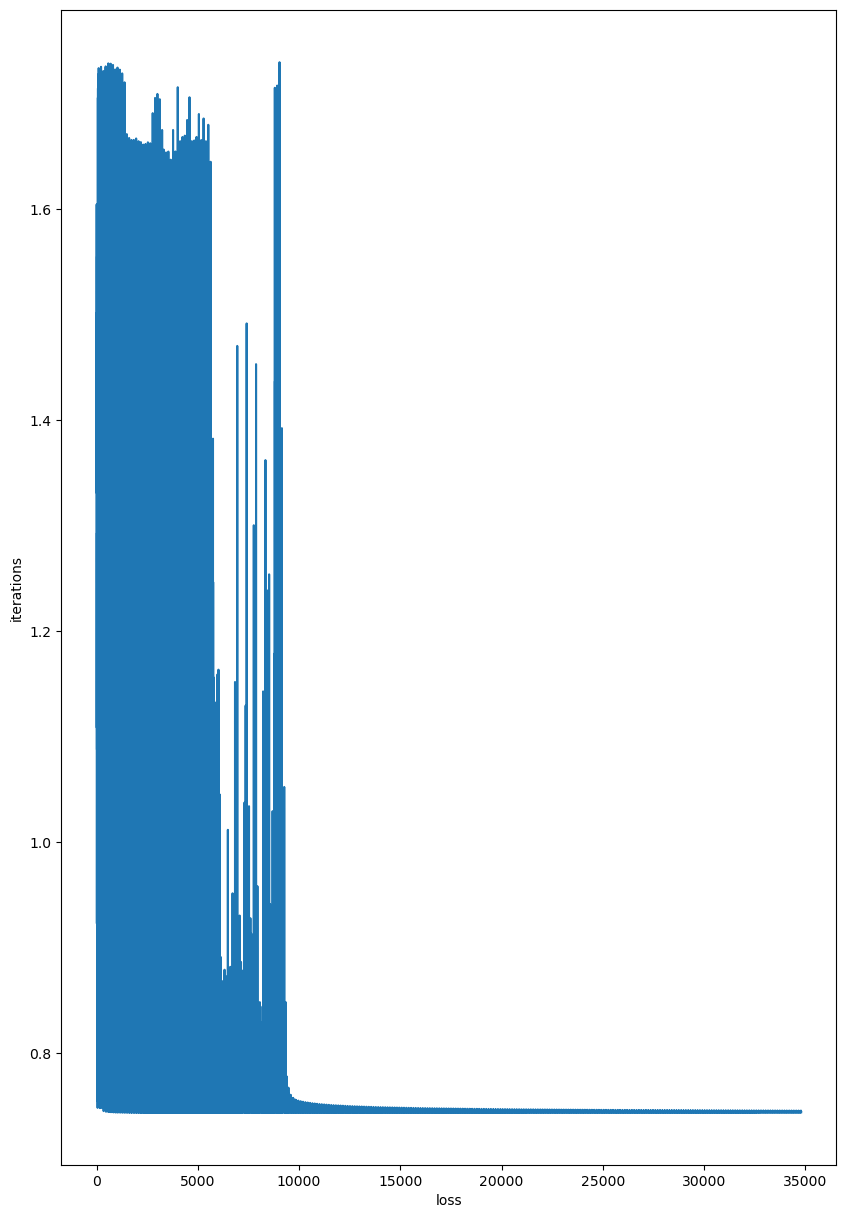

Accuracy:  1.0


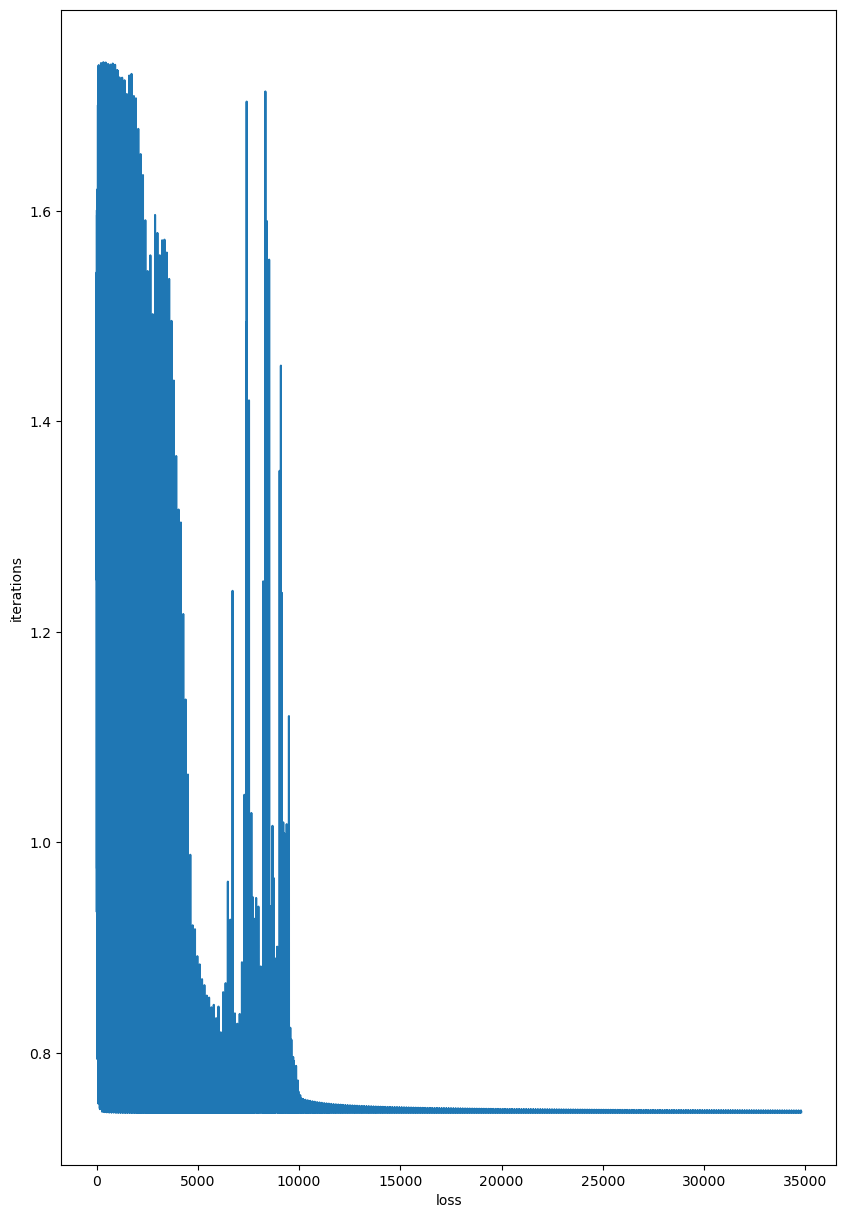

Accuracy:  1.0


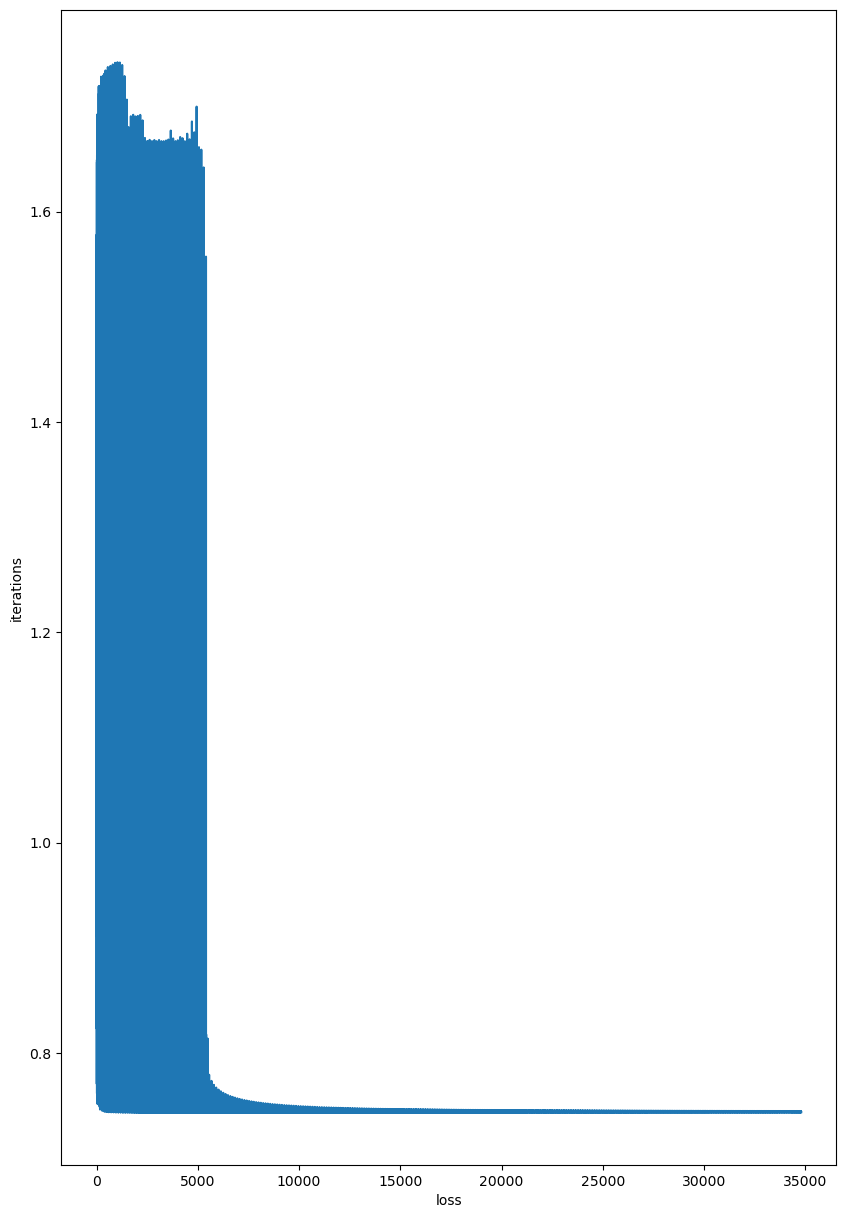

Accuracy:  0.8


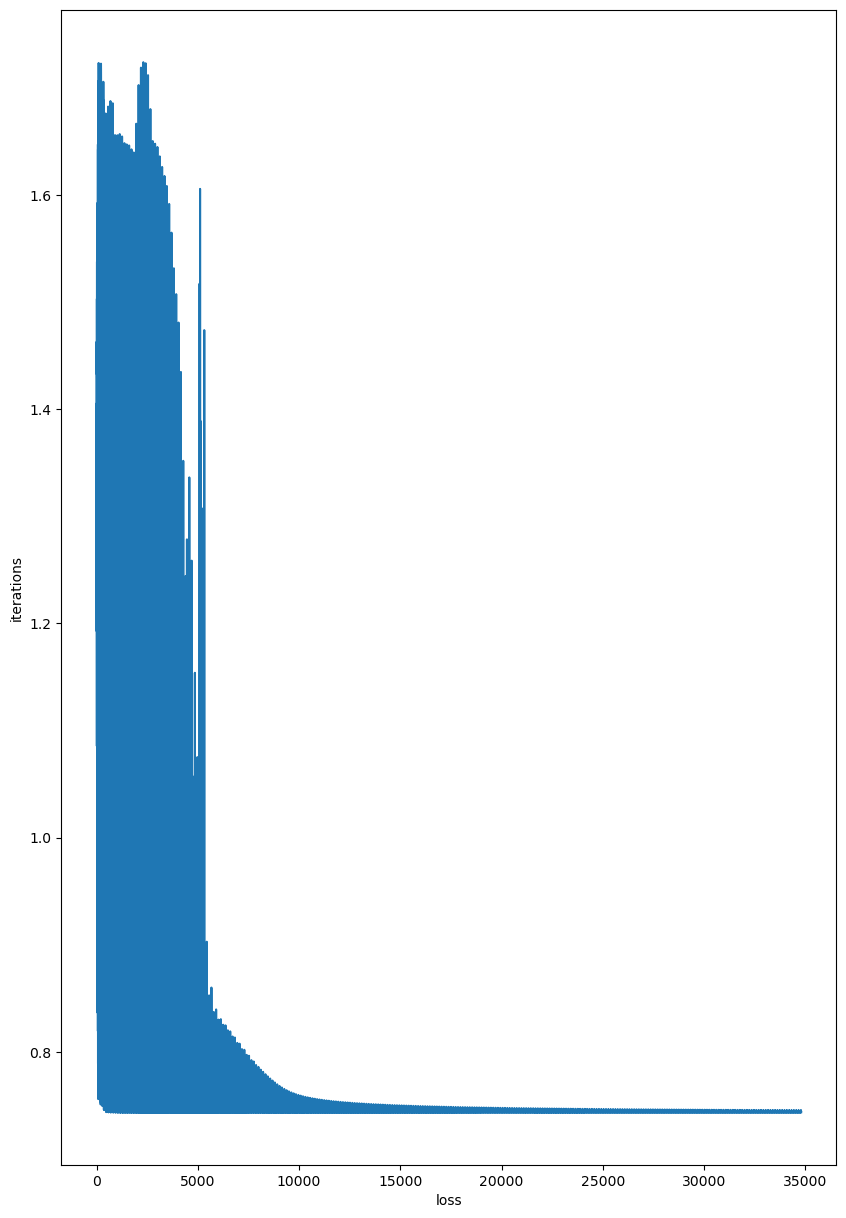

Accuracy:  0.8


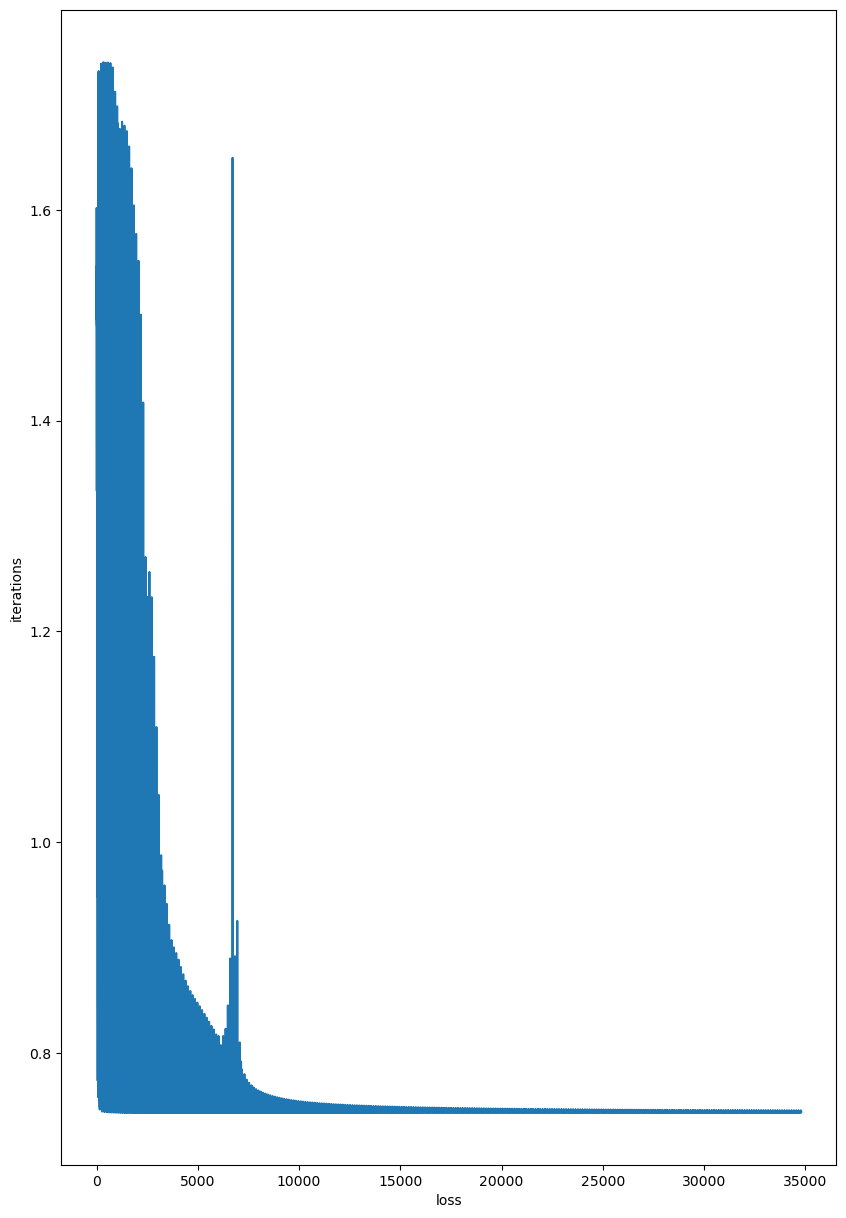

Accuracy:  0.8


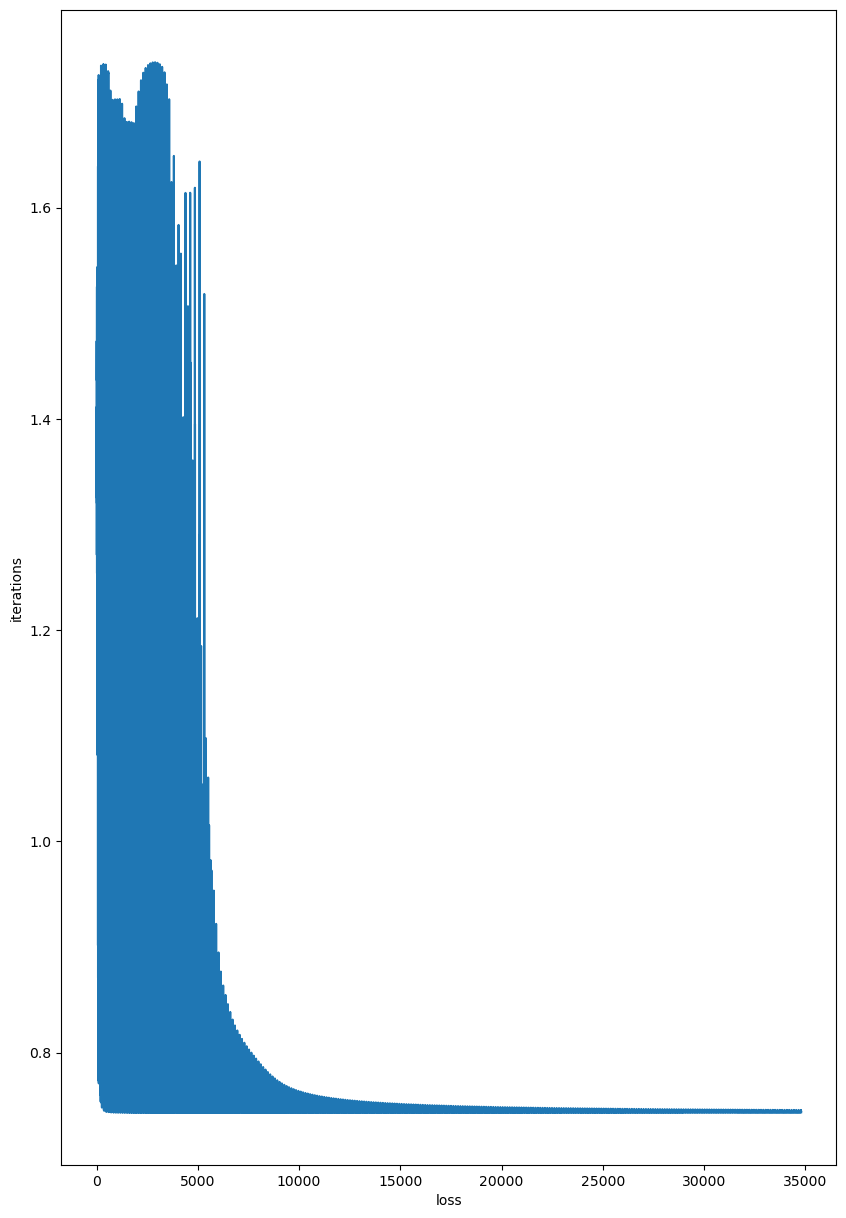

Accuracy:  0.8


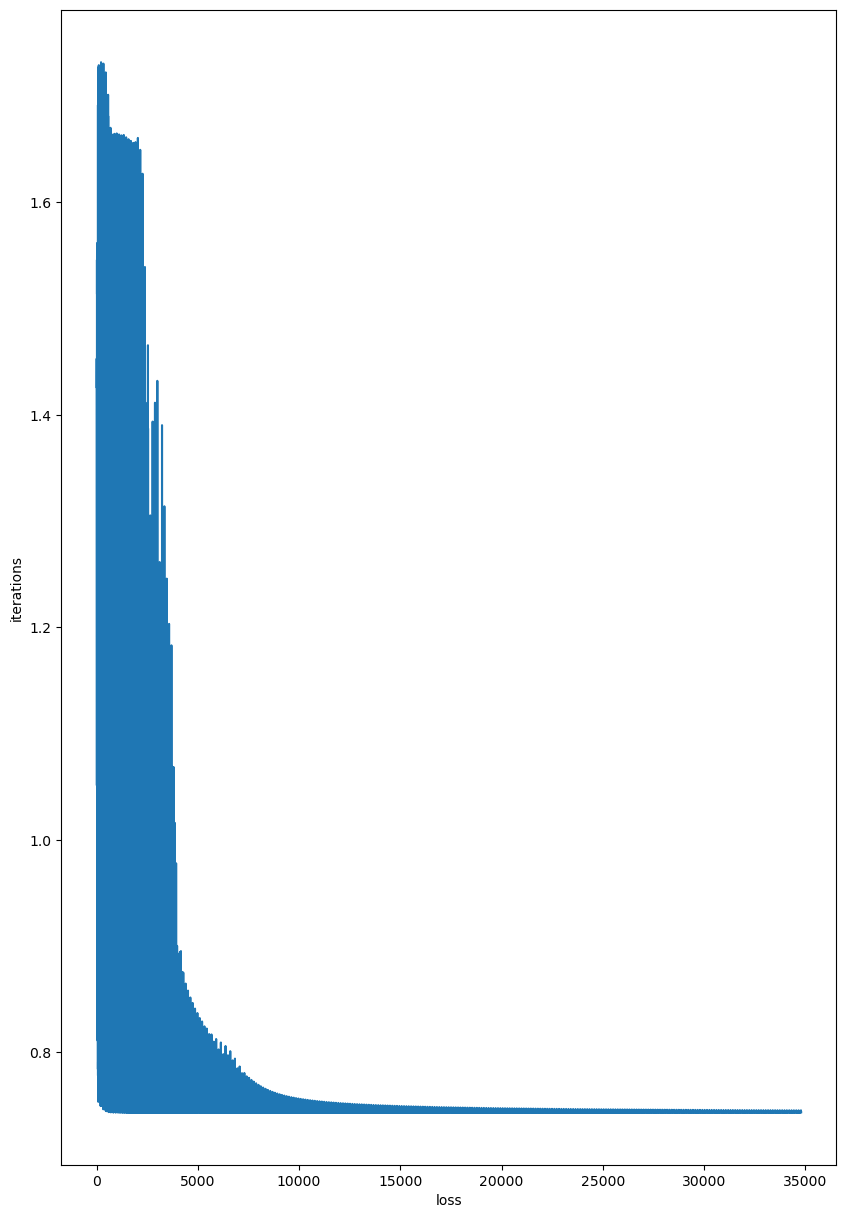

Accuracy:  1.0


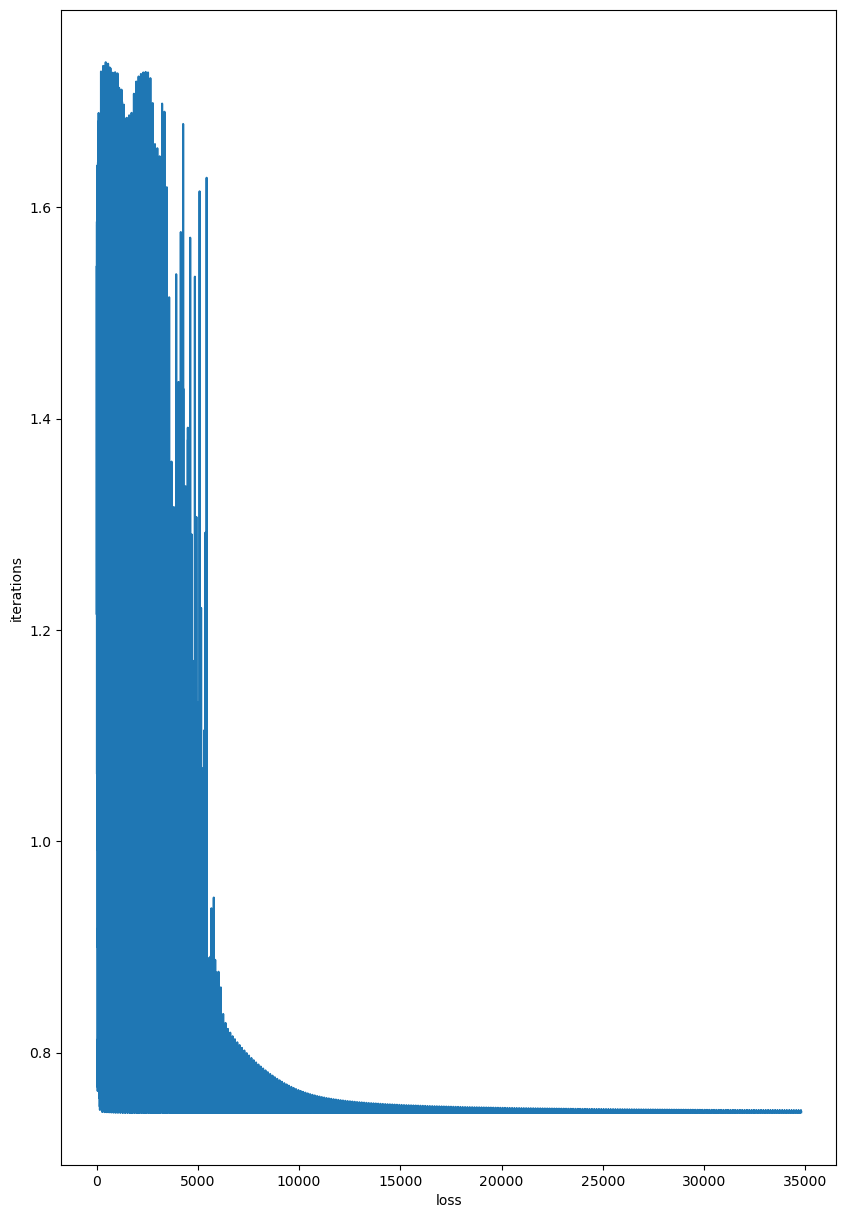

Accuracy:  1.0


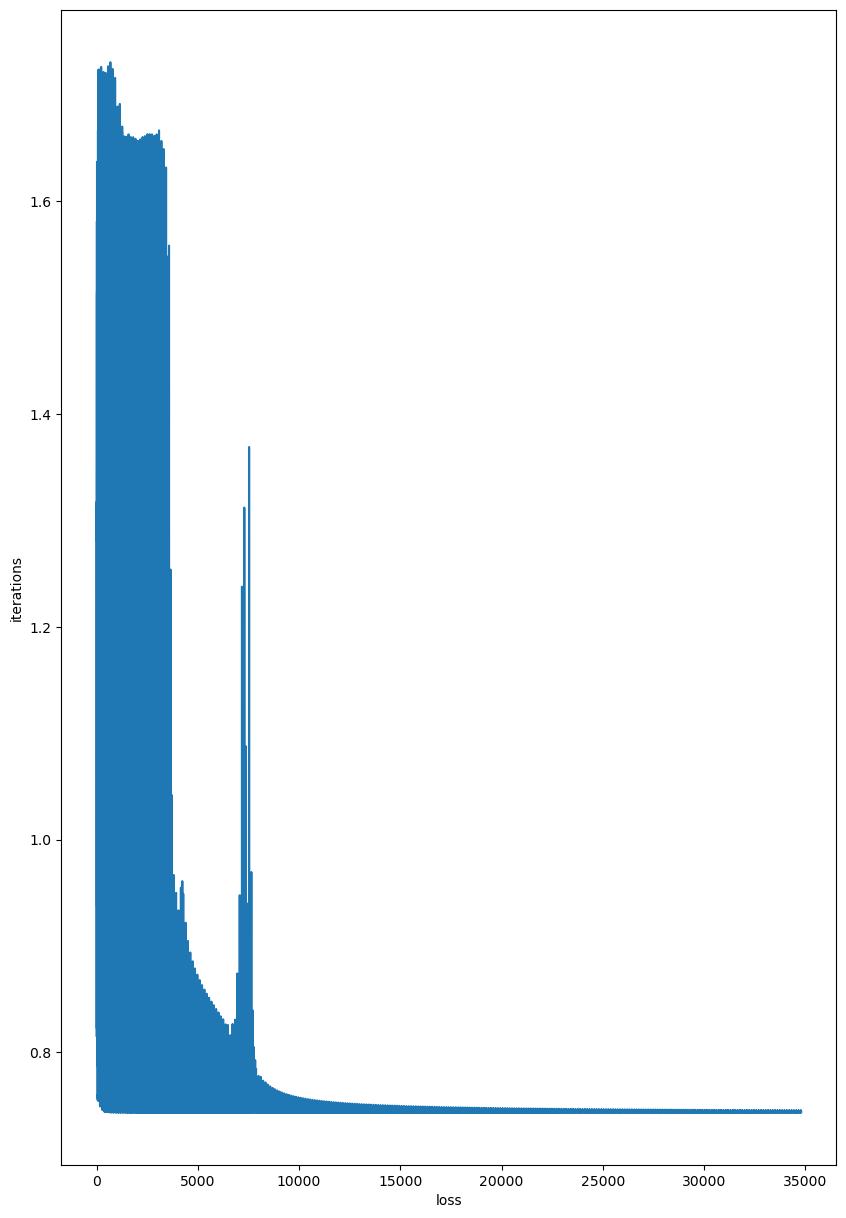

Accuracy:  1.0


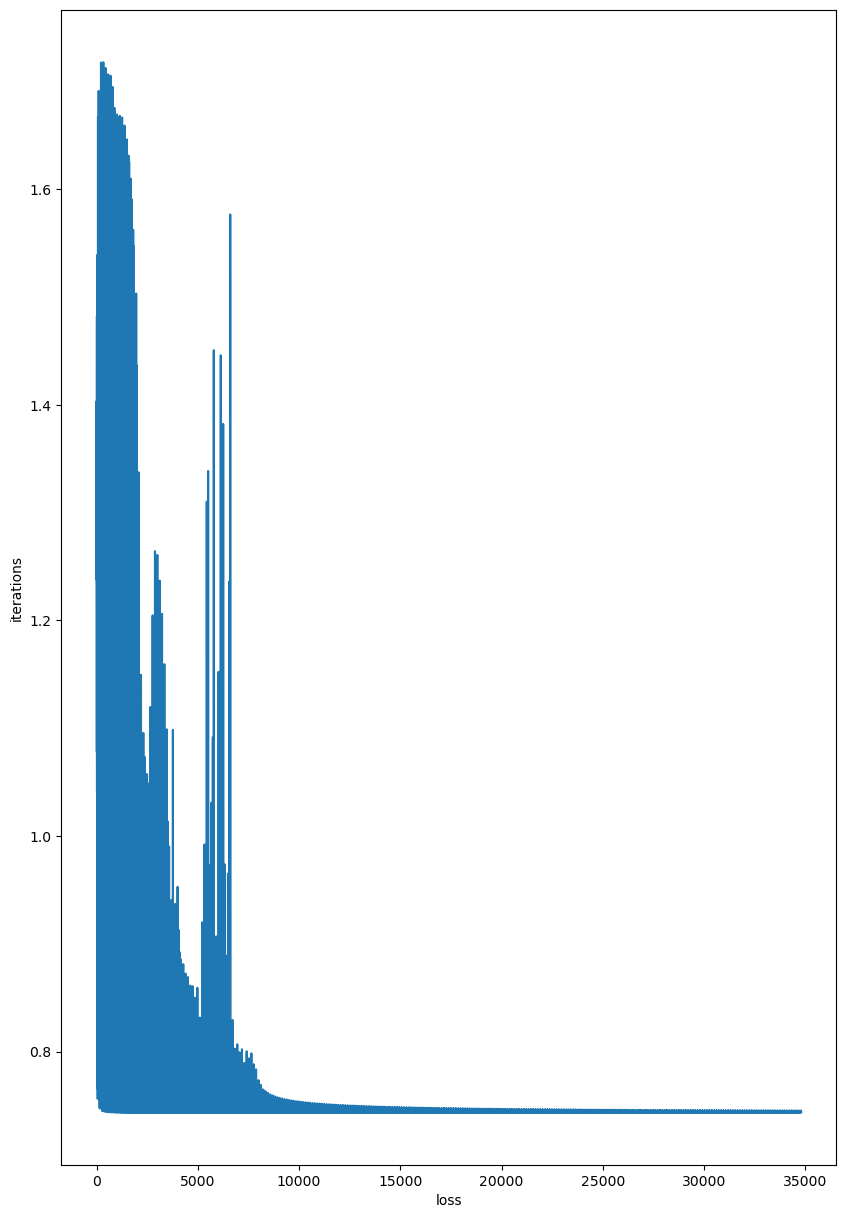

Accuracy:  1.0


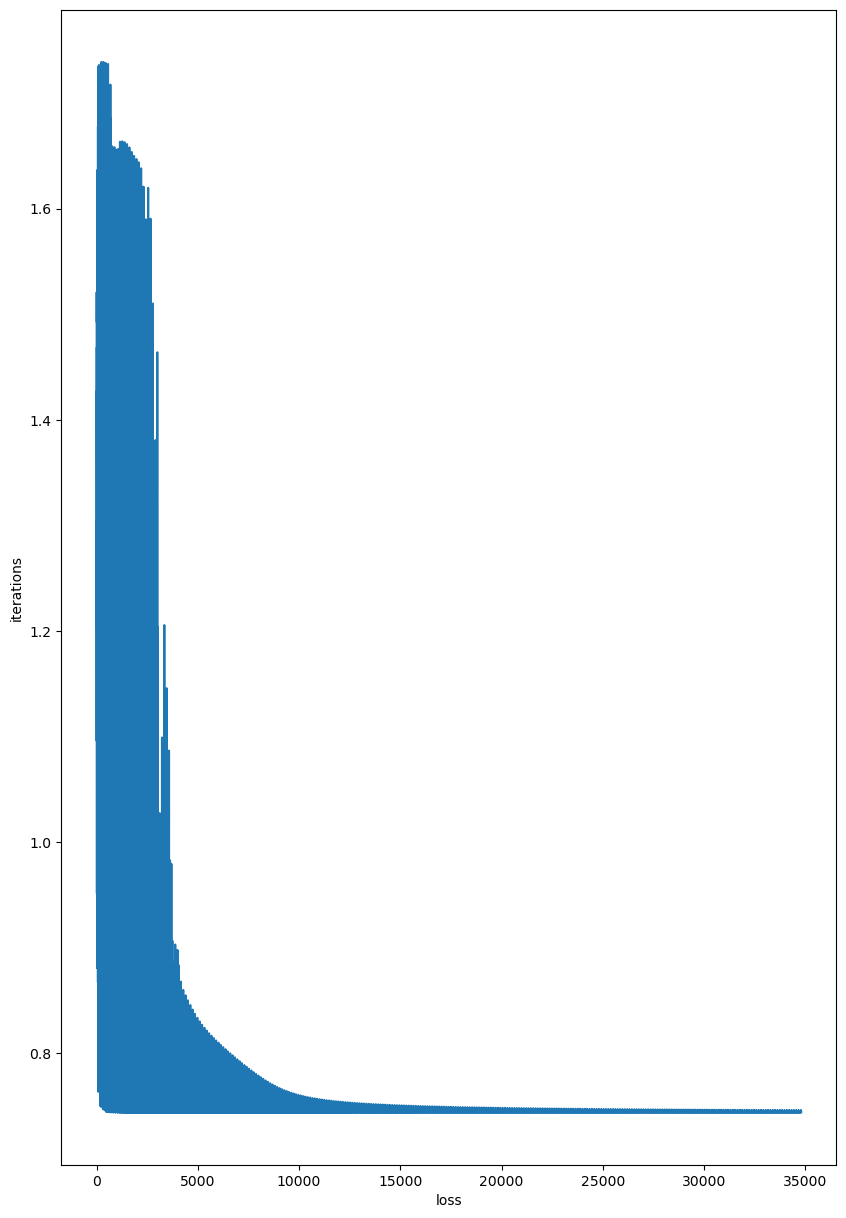

Accuracy:  0.8


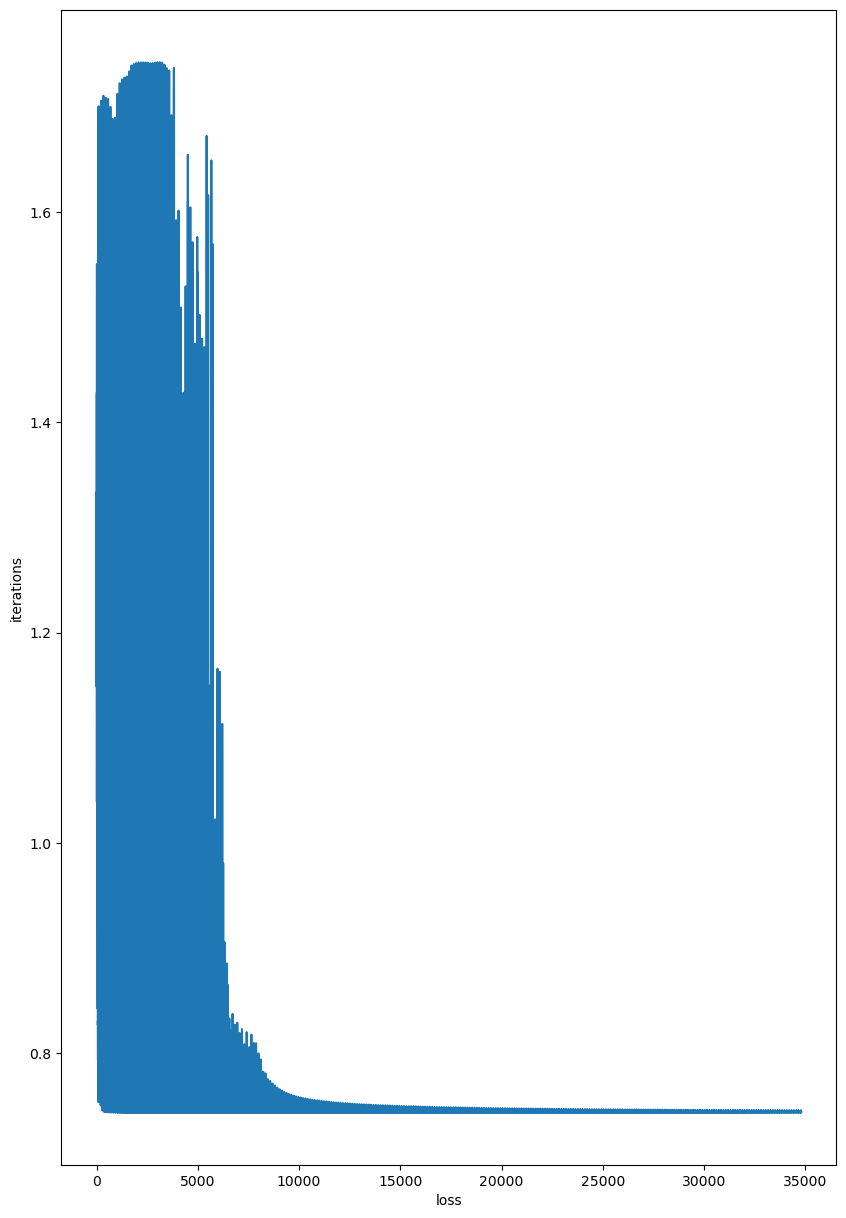

Accuracy:  1.0


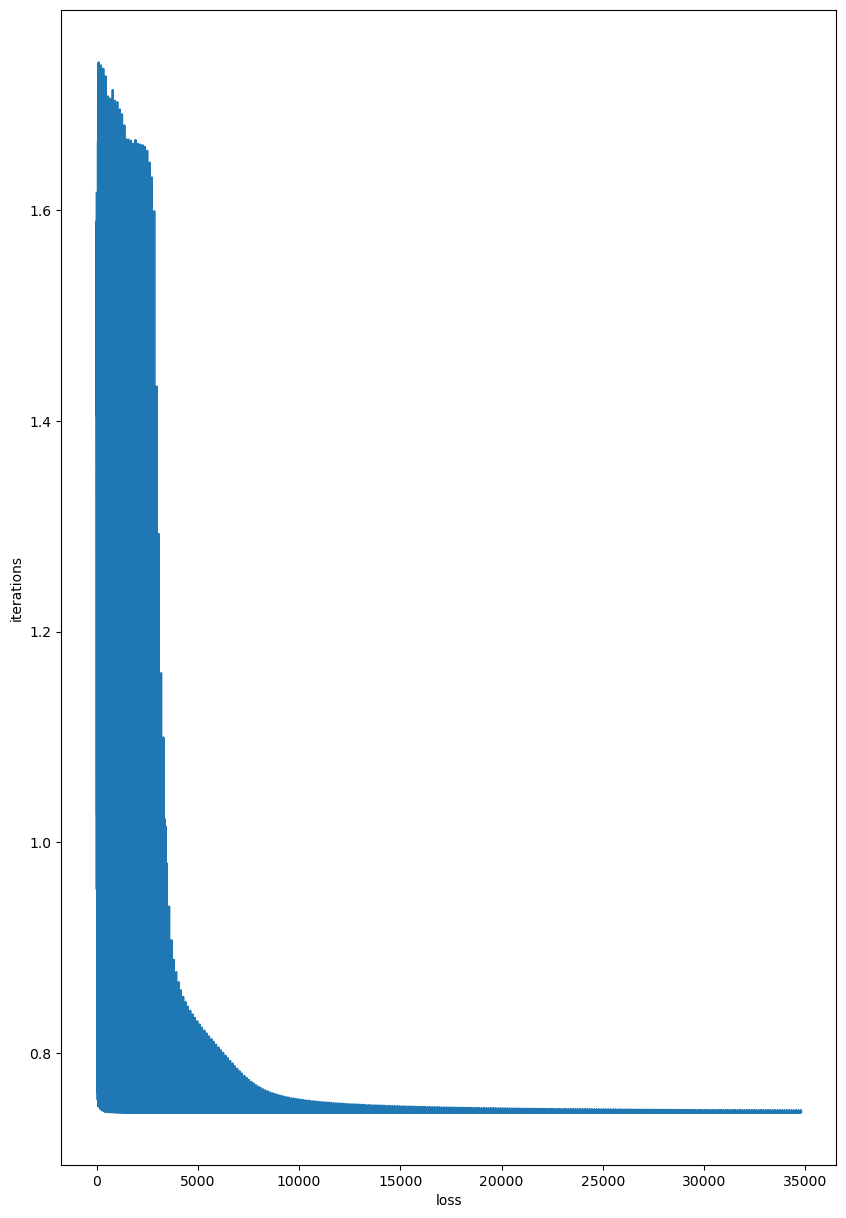

Accuracy:  1.0


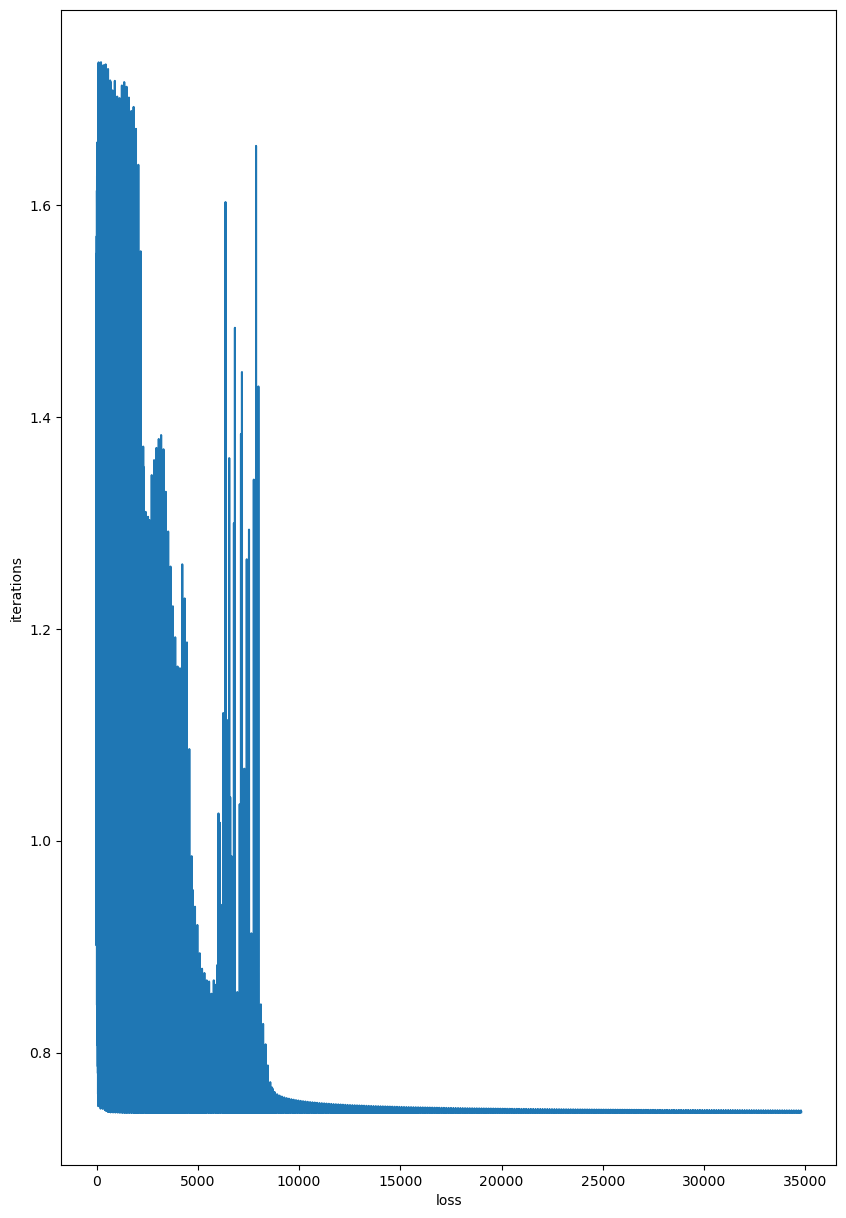

Accuracy:  0.8


In [ ]:
from sklearn.model_selection import KFold

split = 25

#kfold = KFold(n_splits=X.shape[0], shuffle=True)
kfold = KFold(n_splits=split, shuffle=True)

all_pred = np.array([])
y_match = np.array([])
accuracies = []
for fold, (train_ids, test_ids) in enumerate(kfold.split(X)):
    
    model = NeuralNetwork().to(device)
    learning_rate = 0.01
    epoch = 300
    batch = 1

    loss_fn = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


    loss_count, count = train_loop(X[train_ids], 
                                   y.to_numpy().ravel()[train_ids],
                                   model, 
                                   epoch, batch, 
                                   loss_fn, 
                                   optimizer, 
                                   printFn=False)
    
    accuracy,preds = testing(X[test_ids],y.to_numpy().ravel()[test_ids],model,printFn=False)
    accuracies.append(accuracy)
    all_pred = np.append(all_pred,preds)
    y_match = np.append(y_match,y.to_numpy().ravel()[test_ids])

print('Overall Accuracy: ', np.array(accuracies).mean())
confusion_mat = confusion_matrix(y_match, all_pred, labels=[0,1,2,3])

res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(y_match==l,
                                                  all_pred==l,
                                                  labels=[0,1,2,3],
                                                  pos_label=True,
                                                  average=None)
    res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

Let us see whether non-PCA transformed data works better with the neural network.

In [492]:
model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=4, bias=True)
    (4): Softmax(dim=None)
  )
)

In [ ]:
model.linear_relu_stack('0',nn.Linear(1013,30))

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1013, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
    (5): ReLU()
  )
)


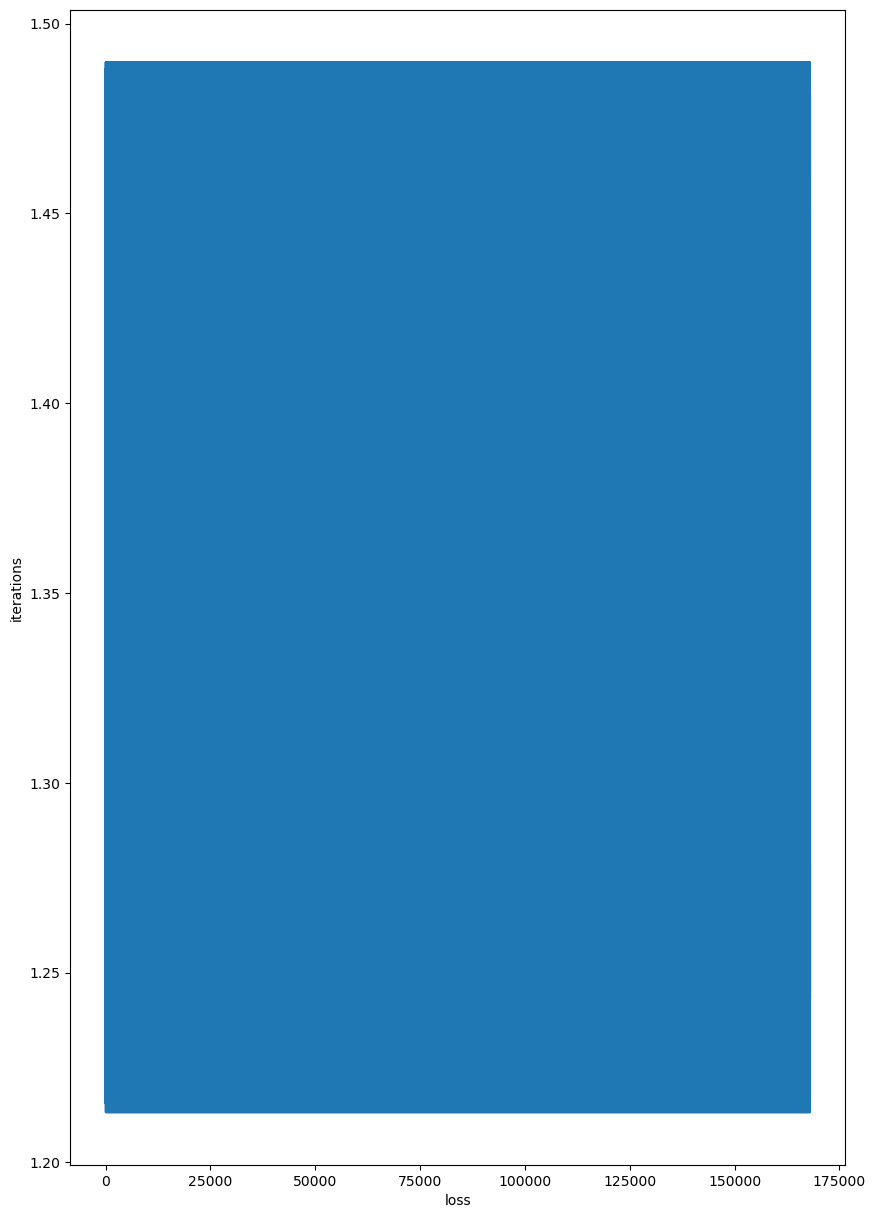

In [451]:
model_noPCA = NeuralNetwork().to(device)
print(model_noPCA)

learning_rate = 0.01
epoch = 2000
batch = 11

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


loss_count, count = train_loop(X_train_noPCA.values, y_train_noPCA, model_noPCA, epoch, batch, loss_fn, optimizer, printFn=False)

In [452]:
accuracy,preds = testing(X_test_noPCA.values,y_test_noPCA,model_noPCA,printFn=False)
print(accuracy)

0.35135135135135137


C:\Users\brian\AppData\Local\Temp\ipykernel_13656\2767529253.py:70: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  t = int(t)


Tried a bunch of other architecture of neural network with various numbers of nodes and layers, but it does not seem to converge. 

In [ ]:
split = 25

#kfold = KFold(n_splits=X.shape[0], shuffle=True)
kfold = KFold(n_splits=split, shuffle=True)

all_pred = np.array([])
y_match = np.array([])
accuracies = []
for fold, (train_ids, test_ids) in enumerate(kfold.split(X)):
    
    model = NeuralNetwork().to(device)
    learning_rate = 0.01
    epoch = 300
    batch = 11

    loss_fn = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


    loss_count, count = train_loop(X[train_ids], 
                                   y.to_numpy().ravel()[train_ids],
                                   model, 
                                   epoch, batch, 
                                   loss_fn, 
                                   optimizer, 
                                   printFn=False)
    
    accuracy,preds = testing(X[test_ids],y.to_numpy().ravel()[test_ids],model,printFn=False)
    accuracies.append(accuracy)
    all_pred = np.append(all_pred,preds)
    y_match = np.append(y_match,y.to_numpy().ravel()[test_ids])

print('Overall Accuracy: ', np.array(accuracies).mean())
conf_mat = confusion_matrix(y_match, all_pred, labels=[0,1,2,3])

res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(y_match==l,
                                                  all_pred==l,
                                                  labels=[0,1,2,3],
                                                  pos_label=True,
                                                  average=None)
    res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matr = confusion_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()